# Synthetic Datasets

## Moons Dataset(1000,0.3)

L1 Regularization - Training accuracy: 0.85
L1 Regularization - Testing accuracy: 0.8533333333333334
L2 Regularization - Training accuracy: 0.9142857142857143
L2 Regularization - Testing accuracy: 0.9033333333333333


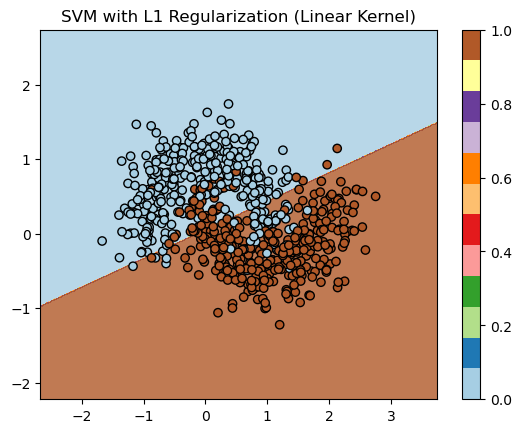

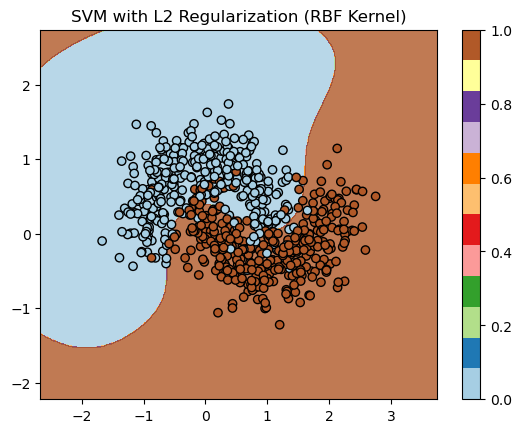

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Generate the dataset
X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# L1 Regularization using LinearSVC (linear kernel)
svm_l1 = make_pipeline(StandardScaler(), LinearSVC(C=1, penalty='l1', dual=False, max_iter=5000))
svm_l1.fit(X_train, y_train)

# L2 Regularization using SVC (linear kernel)
svm_l2 = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1))
svm_l2.fit(X_train, y_train)

# Calculate accuracies
train_accuracy_l1 = svm_l1.score(X_train, y_train)
test_accuracy_l1 = svm_l1.score(X_test, y_test)
print(f"L1 Regularization - Training accuracy: {train_accuracy_l1}")
print(f"L1 Regularization - Testing accuracy: {test_accuracy_l1}")

train_accuracy_l2 = svm_l2.score(X_train, y_train)
test_accuracy_l2 = svm_l2.score(X_test, y_test)
print(f"L2 Regularization - Training accuracy: {train_accuracy_l2}")
print(f"L2 Regularization - Testing accuracy: {test_accuracy_l2}")

# Visualize the decision boundaries
def plot_svm_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired, marker='o')
    plt.title(title)
    plt.colorbar()
    plt.show()

# Plotting decision boundaries
plot_svm_boundary(X_train, y_train, svm_l1, 'SVM with L1 Regularization (Linear Kernel)')
plot_svm_boundary(X_train, y_train, svm_l2, 'SVM with L2 Regularization (RBF Kernel)')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Training accuracy without topological penalty: 0.9171428571428571
Testing accuracy without topological penalty: 0.9166666666666666
Mean error rate: 0.08309523809523811
Training accuracy with topological penalty: 0.8271428571428572
Testing accuracy with topological penalty: 0.8433333333333334
Mean error rate: 0.16476190476190467


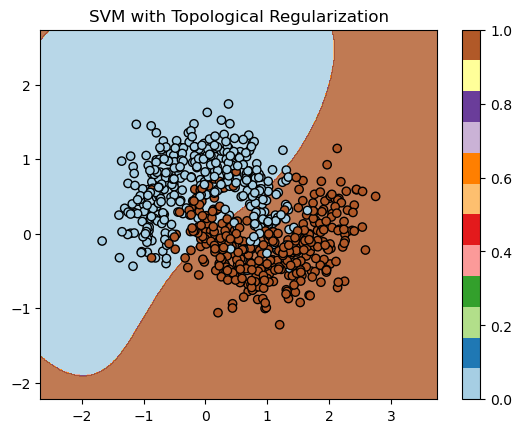

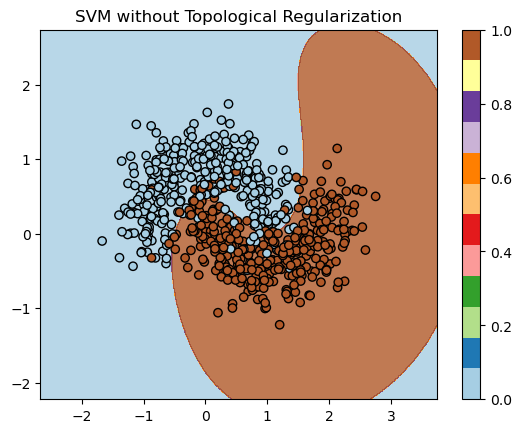

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Create circles dataset
X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {
    'C': [5, 10, 20, 30 , 40],     
    'gamma': ['scale', 'auto'], 
    'kernel': ['rbf']          
}

svm = SVC()

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

svm = SVC(**best_params)
svm.fit(X_train, y_train)

train_accuracy = svm.score(X_train, y_train)
test_accuracy = svm.score(X_test, y_test)
print(f"Training accuracy without topological penalty: {train_accuracy}")
print(f"Testing accuracy without topological penalty: {test_accuracy}")
mean_error_rate = 1.0 - np.mean([train_accuracy, test_accuracy])
print(f"Mean error rate: {mean_error_rate}")

values = svm.decision_function(X)

class UnionFind:
    def __init__(self, n):
        self.parent = list(range(n))
        self.rank = [0] * n
        self.min_point = [i for i in range(n)] 

    def find(self, u):
        if self.parent[u] != u:
            self.parent[u] = self.find(self.parent[u])
        return self.parent[u]

    def union(self, u, v):
        root_u = self.find(u)
        root_v = self.find(v)
        if root_u != root_v:
            if self.rank[root_u] > self.rank[root_v]:
                self.parent[root_v] = root_u
                self.min_point[root_u] = min(self.min_point[root_u], self.min_point[root_v], key=lambda p: sorted_values[p])
            elif self.rank[root_u] < self.rank[root_v]:
                self.parent[root_u] = root_v
                self.min_point[root_v] = min(self.min_point[root_u], self.min_point[root_v], key=lambda p: sorted_values[p])
            else:
                self.parent[root_v] = root_u
                self.rank[root_u] += 1
                self.min_point[root_u] = min(self.min_point[root_u], self.min_point[root_v], key=lambda p: sorted_values[p])

    def find_min(self, u):
        return self.min_point[self.find(u)]

sorted_indices = np.argsort(values)
sorted_points = X[sorted_indices]
sorted_values = values[sorted_indices]

uf = UnionFind(len(X))
pairings_f = []

for i, p in enumerate(sorted_points):
    u = sorted_indices[i]
    if i > 0:
        v = sorted_indices[i - 1]
        uf.union(u, v)
        min_v = uf.find_min(v)
        if sorted_values[min_v] <= 0 and sorted_values[u] >= 0:
            pairings_f.append((min_v, u))

neg_values = -values
neg_sorted_indices = np.argsort(neg_values)
neg_sorted_points = X[neg_sorted_indices]
neg_sorted_values = neg_values[neg_sorted_indices]

uf_neg = UnionFind(len(X))
pairings_neg_f = []

for i, p in enumerate(neg_sorted_points):
    u = neg_sorted_indices[i]
    if i > 0:
        v = neg_sorted_indices[i - 1]
        uf_neg.union(u, v)
        min_v = uf_neg.find_min(v)
        if neg_sorted_values[min_v] <= 0 and neg_sorted_values[u] >= 0:
            pairings_neg_f.append((min_v, u))

critical_pairs = pairings_f + pairings_neg_f

valid_critical_pairs = [(p1, p2) for p1, p2 in critical_pairs if p1 < len(X) and p2 < len(X)]
critical_values = [(values[p1], values[p2]) for p1, p2 in valid_critical_pairs]
robustness = [min(abs(f_p1), abs(f_p2)) for f_p1, f_p2 in critical_values]

def combined_loss(w, X, y, svm, lambda_):
    svm.set_params(C=w[0])
    svm.fit(X, y)
    decision_function = svm.decision_function(X)
    hinge_loss = np.maximum(0, 1 - decision_function).sum()
    topological_penalty = lambda_ * sum(r**2 for r in robustness)
    return hinge_loss + topological_penalty

# Compute the gradient of the combined loss function
def combined_loss_gradient(w, X, y, svm, lambda_):
    svm.set_params(C=w[0])
    svm.fit(X, y)
    decision_function = svm.decision_function(X)
    hinge_loss_grad = np.sum(-(decision_function < 1).astype(int))
    topological_penalty_grad = 2 * lambda_ * sum(r**2 for r in robustness)
    return hinge_loss_grad + topological_penalty_grad

# Gradient descent for combined loss function
def gradient_descent(X, y, svm, lambda_, learning_rate=0.01, num_iterations=100):
    w = np.array([1.0])  # Initialize the weight
    epsilon = 0.01  # Small positive value to prevent C from becoming non-positive
    for i in range(num_iterations):
        grad = combined_loss_gradient(w, X, y, svm, lambda_)
        w[0] -= learning_rate * grad
        w[0] = max(w[0], epsilon)  # Ensure C remains positive
    return w

lambda_ = 0.2
learning_rate = 0.01
num_iterations = 100
optimal_w = gradient_descent(X_train, y_train, svm, lambda_, learning_rate, num_iterations)


svm.set_params(C=optimal_w[0])
svm.fit(X_train, y_train)

train_accuracy = svm.score(X_train, y_train)
test_accuracy = svm.score(X_test, y_test)
print(f"Training accuracy with topological penalty: {train_accuracy}")
print(f"Testing accuracy with topological penalty: {test_accuracy}")

mean_error_rate = 1.0 - np.mean([train_accuracy, test_accuracy])
print(f"Mean error rate: {mean_error_rate}")

def plot_svm_boundary(X, y, svm, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired, marker='o')
    plt.title(title)
    plt.colorbar()
    plt.show()

# plt.figure(figsize=(10, 8))
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', marker='o')
# plt.title('Edges between birth and death points of critical pairs')
# for idx, (p1, p2) in enumerate(valid_critical_pairs[:5]):
#     if p1 < len(X) and p2 < len(X):
#         plt.annotate('', xy=X[p2], xytext=X[p1], arrowprops=dict(arrowstyle='->', color='red', lw=1.5), annotation_clip=False)
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.grid(True)
# plt.colorbar()
# plt.show()

plot_svm_boundary(X_train, y_train, svm, 'SVM with Topological Regularization')

svm_no_penalty = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_no_penalty.fit(X_train, y_train)
plot_svm_boundary(X_train, y_train, svm_no_penalty, 'SVM without Topological Regularization')

## Moons (1000,0.4)

L1 Regularization - Training accuracy: 0.83
L1 Regularization - Testing accuracy: 0.8333333333333334
L2 Regularization - Training accuracy: 0.8657142857142858
L2 Regularization - Testing accuracy: 0.86


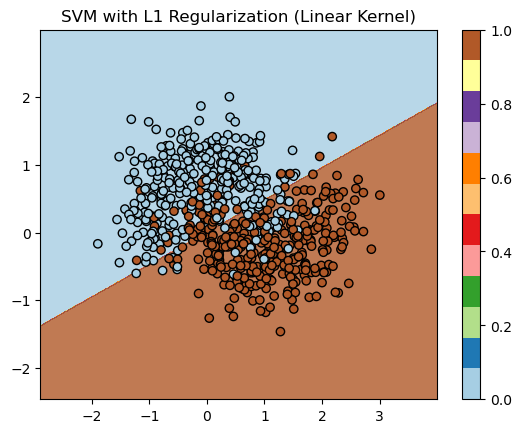

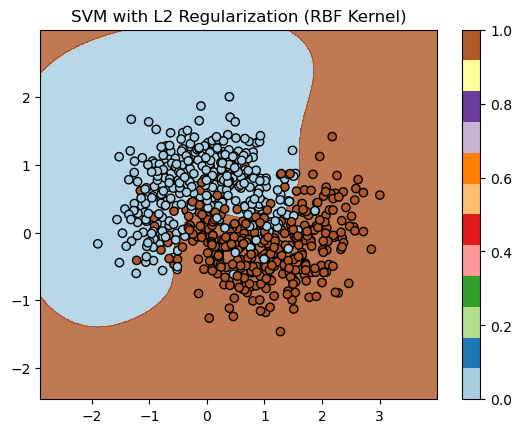

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Generate the dataset
X, y = make_moons(n_samples=1000, noise=0.4, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# L1 Regularization using LinearSVC (linear kernel)
svm_l1 = make_pipeline(StandardScaler(), LinearSVC(C=1.0, penalty='l1', dual=False, max_iter=5000))
svm_l1.fit(X_train, y_train)

# L2 Regularization using SVC (linear kernel)
svm_l2 = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1.0))
svm_l2.fit(X_train, y_train)

# Calculate accuracies
train_accuracy_l1 = svm_l1.score(X_train, y_train)
test_accuracy_l1 = svm_l1.score(X_test, y_test)
print(f"L1 Regularization - Training accuracy: {train_accuracy_l1}")
print(f"L1 Regularization - Testing accuracy: {test_accuracy_l1}")

train_accuracy_l2 = svm_l2.score(X_train, y_train)
test_accuracy_l2 = svm_l2.score(X_test, y_test)
print(f"L2 Regularization - Training accuracy: {train_accuracy_l2}")
print(f"L2 Regularization - Testing accuracy: {test_accuracy_l2}")

# Visualize the decision boundaries
def plot_svm_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired, marker='o')
    plt.title(title)
    plt.colorbar()
    plt.show()

# Plotting decision boundaries
plot_svm_boundary(X_train, y_train, svm_l1, 'SVM with L1 Regularization (Linear Kernel)')
plot_svm_boundary(X_train, y_train, svm_l2, 'SVM with L2 Regularization (RBF Kernel)')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Training accuracy without topological penalty: 0.8728571428571429
Testing accuracy without topological penalty: 0.8466666666666667
Mean error rate: 0.14023809523809527
Training accuracy with topological penalty: 0.8757142857142857
Testing accuracy with topological penalty: 0.85
Mean error rate: 0.13714285714285723


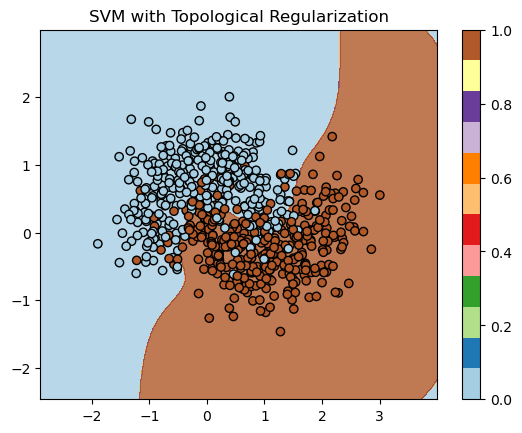

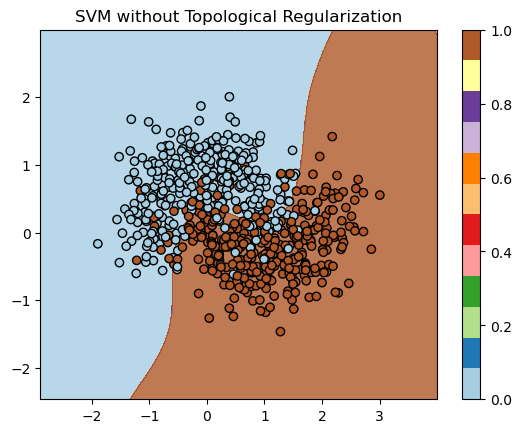

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

X, y = make_moons(n_samples=1000, noise=0.4, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {
    'C': [5, 10, 20, 30 , 40],    
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf']           
}

svm = SVC()

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

svm = SVC(**best_params)
svm.fit(X_train, y_train)

train_accuracy = svm.score(X_train, y_train)
test_accuracy = svm.score(X_test, y_test)
print(f"Training accuracy without topological penalty: {train_accuracy}")
print(f"Testing accuracy without topological penalty: {test_accuracy}")
mean_error_rate = 1.0 - np.mean([train_accuracy, test_accuracy])
print(f"Mean error rate: {mean_error_rate}")

values = svm.decision_function(X)

class UnionFind:
    def __init__(self, n):
        self.parent = list(range(n))
        self.rank = [0] * n
        self.min_point = [i for i in range(n)]  

    def find(self, u):
        if self.parent[u] != u:
            self.parent[u] = self.find(self.parent[u])
        return self.parent[u]

    def union(self, u, v):
        root_u = self.find(u)
        root_v = self.find(v)
        if root_u != root_v:
            if self.rank[root_u] > self.rank[root_v]:
                self.parent[root_v] = root_u
                self.min_point[root_u] = min(self.min_point[root_u], self.min_point[root_v], key=lambda p: sorted_values[p])
            elif self.rank[root_u] < self.rank[root_v]:
                self.parent[root_u] = root_v
                self.min_point[root_v] = min(self.min_point[root_u], self.min_point[root_v], key=lambda p: sorted_values[p])
            else:
                self.parent[root_v] = root_u
                self.rank[root_u] += 1
                self.min_point[root_u] = min(self.min_point[root_u], self.min_point[root_v], key=lambda p: sorted_values[p])

    def find_min(self, u):
        return self.min_point[self.find(u)]

sorted_indices = np.argsort(values)
sorted_points = X[sorted_indices]
sorted_values = values[sorted_indices]

uf = UnionFind(len(X))
pairings_f = []

for i, p in enumerate(sorted_points):
    u = sorted_indices[i]
    if i > 0:
        v = sorted_indices[i - 1]
        uf.union(u, v)
        min_v = uf.find_min(v)
        if sorted_values[min_v] <= 0 and sorted_values[u] >= 0:
            pairings_f.append((min_v, u))

neg_values = -values
neg_sorted_indices = np.argsort(neg_values)
neg_sorted_points = X[neg_sorted_indices]
neg_sorted_values = neg_values[neg_sorted_indices]

uf_neg = UnionFind(len(X))
pairings_neg_f = []

for i, p in enumerate(neg_sorted_points):
    u = neg_sorted_indices[i]
    if i > 0:
        v = neg_sorted_indices[i - 1]
        uf_neg.union(u, v)
        min_v = uf_neg.find_min(v)
        if neg_sorted_values[min_v] <= 0 and neg_sorted_values[u] >= 0:
            pairings_neg_f.append((min_v, u))

critical_pairs = pairings_f + pairings_neg_f

valid_critical_pairs = [(p1, p2) for p1, p2 in critical_pairs if p1 < len(X) and p2 < len(X)]
critical_values = [(values[p1], values[p2]) for p1, p2 in valid_critical_pairs]
robustness = [min(abs(f_p1), abs(f_p2)) for f_p1, f_p2 in critical_values]

def combined_loss(w, X, y, svm, lambda_):
    svm.set_params(C=w[0])
    svm.fit(X, y)
    decision_function = svm.decision_function(X)
    hinge_loss = np.maximum(0, 1 - decision_function).sum()
    topological_penalty = lambda_ * sum(r**2 for r in robustness)
    return hinge_loss + topological_penalty

# Compute the gradient of the combined loss function
def combined_loss_gradient(w, X, y, svm, lambda_):
    svm.set_params(C=w[0])
    svm.fit(X, y)
    decision_function = svm.decision_function(X)
    hinge_loss_grad = np.sum(-(decision_function < 1).astype(int))
    topological_penalty_grad = 2 * lambda_ * sum(r**2 for r in robustness)
    return hinge_loss_grad + topological_penalty_grad

# Gradient descent for combined loss function
def gradient_descent(X, y, svm, lambda_, learning_rate=0.01, num_iterations=100):
    w = np.array([1.0])  # Initialize the weight
    epsilon = 0.01  # Small positive value to prevent C from becoming non-positive
    for i in range(num_iterations):
        grad = combined_loss_gradient(w, X, y, svm, lambda_)
        w[0] -= learning_rate * grad
        w[0] = max(w[0], epsilon)  # Ensure C remains positive
    return w

lambda_ = 0.1
learning_rate = 0.01
num_iterations = 100
optimal_w = gradient_descent(X_train, y_train, svm, lambda_, learning_rate, num_iterations)


svm.set_params(C=optimal_w[0])
svm.fit(X_train, y_train)

train_accuracy = svm.score(X_train, y_train)
test_accuracy = svm.score(X_test, y_test)
print(f"Training accuracy with topological penalty: {train_accuracy}")
print(f"Testing accuracy with topological penalty: {test_accuracy}")

mean_error_rate = 1.0 - np.mean([train_accuracy, test_accuracy])
print(f"Mean error rate: {mean_error_rate}")

def plot_svm_boundary(X, y, svm, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired, marker='o')
    plt.title(title)
    plt.colorbar()
    plt.show()

# plt.figure(figsize=(10, 8))
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', marker='o')
# plt.title('Edges between birth and death points of critical pairs')
# for idx, (p1, p2) in enumerate(valid_critical_pairs[:5]):
#     if p1 < len(X) and p2 < len(X):
#         plt.annotate('', xy=X[p2], xytext=X[p1], arrowprops=dict(arrowstyle='->', color='red', lw=1.5), annotation_clip=False)
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.grid(True)
# plt.colorbar()
# plt.show()

plot_svm_boundary(X_train, y_train, svm, 'SVM with Topological Regularization')

svm_no_penalty = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_no_penalty.fit(X_train, y_train)
plot_svm_boundary(X_train, y_train, svm_no_penalty, 'SVM without Topological Regularization')

## Circles(500,0.2)

L1 Regularization - Training accuracy: 0.49714285714285716
L1 Regularization - Testing accuracy: 0.5266666666666666
L2 Regularization - Training accuracy: 0.68
L2 Regularization - Testing accuracy: 0.6533333333333333


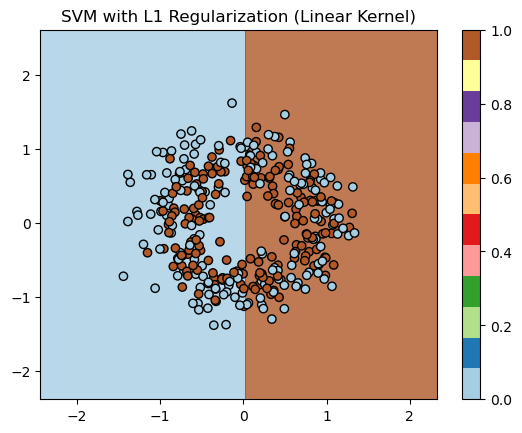

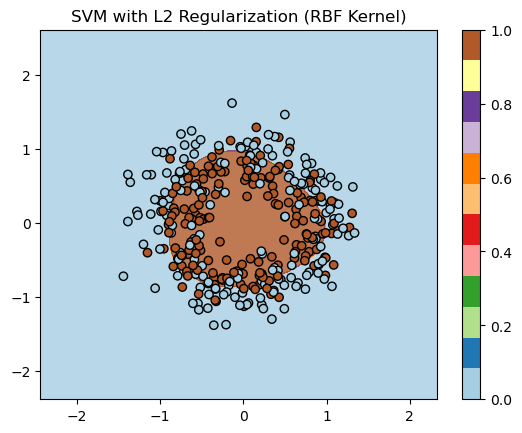

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Generate the dataset
X, y = make_circles(n_samples=500, noise=0.2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# L1 Regularization using LinearSVC (linear kernel)
svm_l1 = make_pipeline(StandardScaler(), LinearSVC(C=1.0, penalty='l1', dual=False, max_iter=5000))
svm_l1.fit(X_train, y_train)

# L2 Regularization using SVC (linear kernel)
svm_l2 = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1.0))
svm_l2.fit(X_train, y_train)

# Calculate accuracies
train_accuracy_l1 = svm_l1.score(X_train, y_train)
test_accuracy_l1 = svm_l1.score(X_test, y_test)
print(f"L1 Regularization - Training accuracy: {train_accuracy_l1}")
print(f"L1 Regularization - Testing accuracy: {test_accuracy_l1}")

train_accuracy_l2 = svm_l2.score(X_train, y_train)
test_accuracy_l2 = svm_l2.score(X_test, y_test)
print(f"L2 Regularization - Training accuracy: {train_accuracy_l2}")
print(f"L2 Regularization - Testing accuracy: {test_accuracy_l2}")

# Visualize the decision boundaries
def plot_svm_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired, marker='o')
    plt.title(title)
    plt.colorbar()
    plt.show()

# Plotting decision boundaries
plot_svm_boundary(X_train, y_train, svm_l1, 'SVM with L1 Regularization (Linear Kernel)')
plot_svm_boundary(X_train, y_train, svm_l2, 'SVM with L2 Regularization (RBF Kernel)')

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Training accuracy without topological penalty: 0.6714285714285714
Testing accuracy without topological penalty: 0.6333333333333333
Mean error rate: 0.3476190476190477
Training accuracy with topological penalty: 0.7028571428571428
Testing accuracy with topological penalty: 0.6666666666666666
Mean error rate: 0.3152380952380953


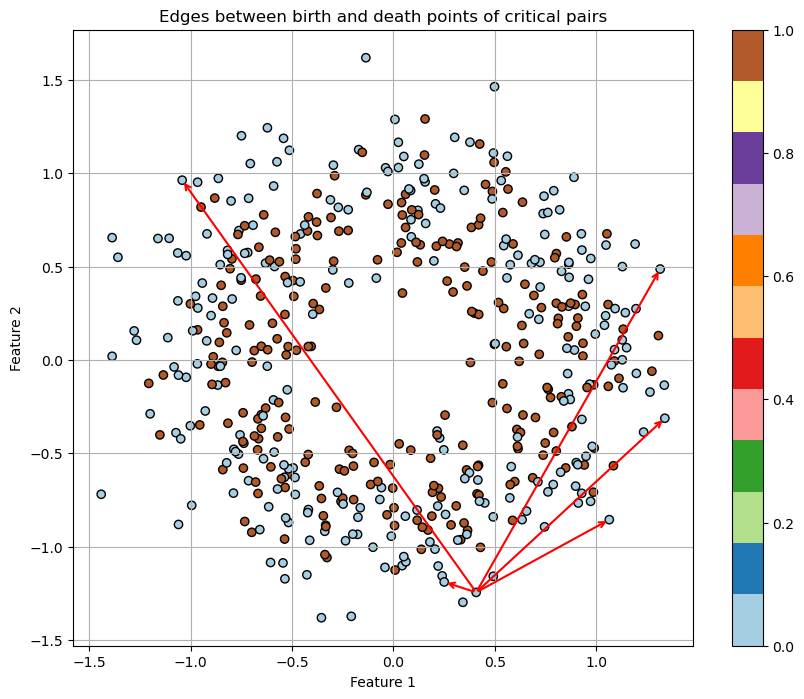

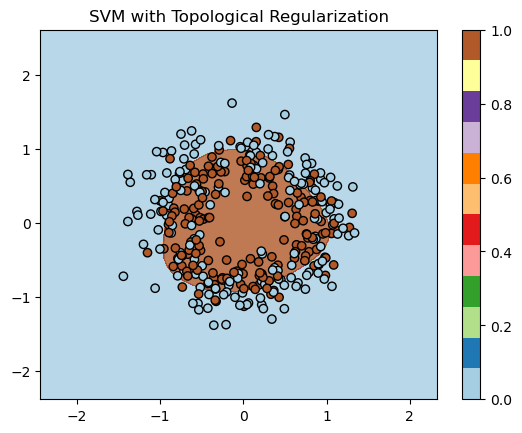

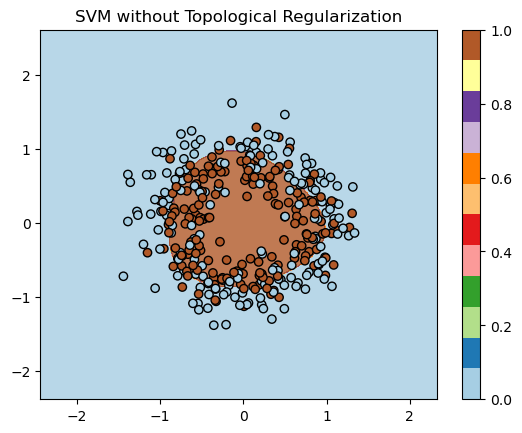

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

X, y = make_circles(n_samples=500, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {
    'C': [0.001, 0.002, 0.004],     
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf']   
}

svm = SVC()

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

svm = SVC(**best_params)
svm.fit(X_train, y_train)

train_accuracy = svm.score(X_train, y_train)
test_accuracy = svm.score(X_test, y_test)
print(f"Training accuracy without topological penalty: {train_accuracy}")
print(f"Testing accuracy without topological penalty: {test_accuracy}")
mean_error_rate = 1.0 - np.mean([train_accuracy, test_accuracy])
print(f"Mean error rate: {mean_error_rate}")

values = svm.decision_function(X)

class UnionFind:
    def __init__(self, n):
        self.parent = list(range(n))
        self.rank = [0] * n
        self.min_point = [i for i in range(n)] 

    def find(self, u):
        if self.parent[u] != u:
            self.parent[u] = self.find(self.parent[u])
        return self.parent[u]

    def union(self, u, v):
        root_u = self.find(u)
        root_v = self.find(v)
        if root_u != root_v:
            if self.rank[root_u] > self.rank[root_v]:
                self.parent[root_v] = root_u
                self.min_point[root_u] = min(self.min_point[root_u], self.min_point[root_v], key=lambda p: sorted_values[p])
            elif self.rank[root_u] < self.rank[root_v]:
                self.parent[root_u] = root_v
                self.min_point[root_v] = min(self.min_point[root_u], self.min_point[root_v], key=lambda p: sorted_values[p])
            else:
                self.parent[root_v] = root_u
                self.rank[root_u] += 1
                self.min_point[root_u] = min(self.min_point[root_u], self.min_point[root_v], key=lambda p: sorted_values[p])

    def find_min(self, u):
        return self.min_point[self.find(u)]

sorted_indices = np.argsort(values)
sorted_points = X[sorted_indices]
sorted_values = values[sorted_indices]

uf = UnionFind(len(X))
pairings_f = []

for i, p in enumerate(sorted_points):
    u = sorted_indices[i]
    if i > 0:
        v = sorted_indices[i - 1]
        uf.union(u, v)
        min_v = uf.find_min(v)
        if sorted_values[min_v] <= 0 and sorted_values[u] >= 0:
            pairings_f.append((min_v, u))

neg_values = -values
neg_sorted_indices = np.argsort(neg_values)
neg_sorted_points = X[neg_sorted_indices]
neg_sorted_values = neg_values[neg_sorted_indices]

uf_neg = UnionFind(len(X))
pairings_neg_f = []

for i, p in enumerate(neg_sorted_points):
    u = neg_sorted_indices[i]
    if i > 0:
        v = neg_sorted_indices[i - 1]
        uf_neg.union(u, v)
        min_v = uf_neg.find_min(v)
        if neg_sorted_values[min_v] <= 0 and neg_sorted_values[u] >= 0:
            pairings_neg_f.append((min_v, u))

critical_pairs = pairings_f + pairings_neg_f

valid_critical_pairs = [(p1, p2) for p1, p2 in critical_pairs if p1 < len(X) and p2 < len(X)]
critical_values = [(values[p1], values[p2]) for p1, p2 in valid_critical_pairs]
robustness = [min(abs(f_p1), abs(f_p2)) for f_p1, f_p2 in critical_values]

def combined_loss(w, X, y, svm, lambda_):
    svm.set_params(C=w[0])
    svm.fit(X, y)
    decision_function = svm.decision_function(X)
    hinge_loss = np.maximum(0, 1 - decision_function).sum()
    topological_penalty = lambda_ * sum(r**2 for r in robustness)
    return hinge_loss + topological_penalty

# Compute the gradient of the combined loss function
def combined_loss_gradient(w, X, y, svm, lambda_):
    svm.set_params(C=w[0])
    svm.fit(X, y)
    decision_function = svm.decision_function(X)
    hinge_loss_grad = np.sum(-(decision_function < 1).astype(int))
    topological_penalty_grad = 2 * lambda_ * sum(r**2 for r in robustness)
    return hinge_loss_grad + topological_penalty_grad

# Gradient descent for combined loss function
def gradient_descent(X, y, svm, lambda_, learning_rate=0.01, num_iterations=100):
    w = np.array([1.0])  # Initialize the weight
    epsilon = 0.01  # Small positive value to prevent C from becoming non-positive
    for i in range(num_iterations):
        grad = combined_loss_gradient(w, X, y, svm, lambda_)
        w[0] -= learning_rate * grad
        w[0] = max(w[0], epsilon)  # Ensure C remains positive
    return w

lambda_ = 0.2
learning_rate = 0.01
num_iterations = 20
optimal_w = gradient_descent(X_train, y_train, svm, lambda_, learning_rate, num_iterations)


svm.set_params(C=optimal_w[0])
svm.fit(X_train, y_train)

train_accuracy = svm.score(X_train, y_train)
test_accuracy = svm.score(X_test, y_test)
print(f"Training accuracy with topological penalty: {train_accuracy}")
print(f"Testing accuracy with topological penalty: {test_accuracy}")

mean_error_rate = 1.0 - np.mean([train_accuracy, test_accuracy])
print(f"Mean error rate: {mean_error_rate}")

def plot_svm_boundary(X, y, svm, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired, marker='o')
    plt.title(title)
    plt.colorbar()
    plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', marker='o')
plt.title('Edges between birth and death points of critical pairs')
for idx, (p1, p2) in enumerate(valid_critical_pairs[:5]):
    if p1 < len(X) and p2 < len(X):
        plt.annotate('', xy=X[p2], xytext=X[p1], arrowprops=dict(arrowstyle='->', color='red', lw=1.5), annotation_clip=False)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.colorbar()
plt.show()

plot_svm_boundary(X_train, y_train, svm, 'SVM with Topological Regularization')

svm_no_penalty = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_no_penalty.fit(X_train, y_train)
plot_svm_boundary(X_train, y_train, svm_no_penalty, 'SVM without Topological Regularization')

# Datasets not in the paper but tested by us

## Iris Dataset

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Using only the first two features for visualization
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# L1 Regularization using LinearSVC (linear kernel)
svm_l1 = make_pipeline(StandardScaler(), LinearSVC(C=0.3, penalty='l1', dual=False, max_iter=5000))
svm_l1.fit(X_train, y_train)

# L2 Regularization using SVC (linear kernel)
svm_l2 = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=0.1))
svm_l2.fit(X_train, y_train)

# Calculate accuracies
train_accuracy_l1 = svm_l1.score(X_train, y_train)
test_accuracy_l1 = svm_l1.score(X_test, y_test)
print(f"L1 Regularization - Training accuracy: {train_accuracy_l1}")
print(f"L1 Regularization - Testing accuracy: {test_accuracy_l1}")

train_accuracy_l2 = svm_l2.score(X_train, y_train)
test_accuracy_l2 = svm_l2.score(X_test, y_test)
print(f"L2 Regularization - Training accuracy: {train_accuracy_l2}")
print(f"L2 Regularization - Testing accuracy: {test_accuracy_l2}")

L1 Regularization - Training accuracy: 0.9142857142857143
L1 Regularization - Testing accuracy: 0.9111111111111111
L2 Regularization - Training accuracy: 0.8952380952380953
L2 Regularization - Testing accuracy: 0.9333333333333333


In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Using only the first two features for visualization
y = iris.target

# Standardize the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Grid search for initial best parameters
param_grid = {
    'C': [1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear']
}

svm = SVC(decision_function_shape='ovr')
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train SVM with best parameters
svm = SVC(**best_params, decision_function_shape='ovr')
svm.fit(X_train, y_train)

train_accuracy = svm.score(X_train, y_train)
test_accuracy = svm.score(X_test, y_test)
print(f"Training accuracy without topological penalty: {train_accuracy}")
print(f"Testing accuracy without topological penalty: {test_accuracy}")
mean_error_rate = 1.0 - np.mean([train_accuracy, test_accuracy])
print(f"Mean error rate: {mean_error_rate}")

# Compute decision function values
values = svm.decision_function(X)

# Union-Find data structure for tracking connected components
class UnionFind:
    def __init__(self, n):
        self.parent = list(range(n))
        self.rank = [0] * n
        self.min_point = list(range(n))  # Track the minimum points by index

    def find(self, u):
        if self.parent[u] != u:
            self.parent[u] = self.find(self.parent[u])
        return self.parent[u]

    def union(self, u, v, sorted_values):
        root_u = self.find(u)
        root_v = self.find(v)
        if root_u != root_v:
            if self.rank[root_u] > self.rank[root_v]:
                self.parent[root_v] = root_u
                self.min_point[root_u] = min(self.min_point[root_u], self.min_point[root_v], key=lambda p: sorted_values[p])
            elif self.rank[root_u] < self.rank[root_v]:
                self.parent[root_u] = root_v
                self.min_point[root_v] = min(self.min_point[root_u], self.min_point[root_v], key=lambda p: sorted_values[p])
            else:
                self.parent[root_v] = root_u
                self.rank[root_u] += 1
                self.min_point[root_u] = min(self.min_point[root_u], self.min_point[root_v], key=lambda p: sorted_values[p])

    def find_min(self, u):
        return self.min_point[self.find(u)]

# Compute critical pairs for each class
pairings = []
for class_idx in range(values.shape[1]):
    sorted_indices = np.argsort(values[:, class_idx])
    sorted_values = values[sorted_indices, class_idx]
    
    uf = UnionFind(len(X))
    pairings_f = []
    
    for i in range(1, len(sorted_indices)):
        u = sorted_indices[i]
        v = sorted_indices[i - 1]
        uf.union(u, v, sorted_values)
        min_v = uf.find_min(v)
        if sorted_values[min_v] <= 0 and sorted_values[u] >= 0:
            pairings_f.append((min_v, u))
    
    pairings.extend(pairings_f)

valid_critical_pairs = [(p1, p2) for p1, p2 in pairings if p1 < len(X) and p2 < len(X)]

# Flatten the critical values for robustness computation
critical_values = [(values[p1].flatten(), values[p2].flatten()) for p1, p2 in valid_critical_pairs]
robustness = [min(np.min(np.abs(f_p1)), np.min(np.abs(f_p2))) for f_p1, f_p2 in critical_values]

# Define the combined loss function with topological penalty
def combined_loss(w, X, y, svm, lambda_):
    svm.set_params(C=w[0])
    svm.fit(X, y)
    decision_function = svm.decision_function(X)
    hinge_loss = np.maximum(0, 1 - decision_function).sum()
    topological_penalty = lambda_ * sum(r**2 for r in robustness)
    return hinge_loss + topological_penalty

# Compute the gradient of the combined loss function
def combined_loss_gradient(w, X, y, svm, lambda_):
    svm.set_params(C=w[0])
    svm.fit(X, y)
    decision_function = svm.decision_function(X)
    hinge_loss_grad = np.sum(-(decision_function < 1).astype(int))
    topological_penalty_grad = 2 * lambda_ * sum(r**2 for r in robustness)
    return hinge_loss_grad + topological_penalty_grad

# Gradient descent for combined loss function
def gradient_descent(X, y, svm, lambda_, learning_rate=0.01, num_iterations=100):
    w = np.array([1.0])  # Initialize the weight
    epsilon = 0.01  # Small positive value to prevent C from becoming non-positive
    for i in range(num_iterations):
        grad = combined_loss_gradient(w, X, y, svm, lambda_)
        w[0] -= learning_rate * grad
        w[0] = max(w[0], epsilon)  # Ensure C remains positive
    return w

# Run gradient descent
lambda_ = 0.01
learning_rate = 0.02
num_iterations = 5
optimal_w = gradient_descent(X_train, y_train, svm, lambda_, learning_rate, num_iterations)

# Train SVM with the optimal C value
svm.set_params(C=optimal_w[0])
svm.fit(X_train, y_train)

train_accuracy = svm.score(X_train, y_train)
test_accuracy = svm.score(X_test, y_test)
print(f"Training accuracy with topological penalty: {train_accuracy}")
print(f"Testing accuracy with topological penalty: {test_accuracy}")

mean_error_rate = 1.0 - np.mean([train_accuracy, test_accuracy])
print(f"Mean error rate: {mean_error_rate}")

svm_no_penalty = SVC(kernel='rbf', C=1.0, gamma='scale', decision_function_shape='ovr')
svm_no_penalty.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Training accuracy without topological penalty: 0.9703703703703703
Testing accuracy without topological penalty: 0.9333333333333333
Mean error rate: 0.04814814814814816
Training accuracy with topological penalty: 0.9629629629629629
Testing accuracy with topological penalty: 1.0
Mean error rate: 0.0185185185185186


SVC()

## Load-Digits 

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import make_pipeline

# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Standardize the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# L1 Regularization using LinearSVC (linear kernel)
svm_l1 = make_pipeline(StandardScaler(), LinearSVC(C=1.0, penalty='l1', dual=False, max_iter=5000))
svm_l1.fit(X_train, y_train)

# L2 Regularization using SVC (linear kernel)
svm_l2 = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1.0))
svm_l2.fit(X_train, y_train)

# Calculate accuracies
train_accuracy_l1 = svm_l1.score(X_train, y_train)
test_accuracy_l1 = svm_l1.score(X_test, y_test)
print(f"L1 Regularization - Training accuracy: {train_accuracy_l1}")
print(f"L1 Regularization - Testing accuracy: {test_accuracy_l1}")

train_accuracy_l2 = svm_l2.score(X_train, y_train)
test_accuracy_l2 = svm_l2.score(X_test, y_test)
print(f"L2 Regularization - Training accuracy: {train_accuracy_l2}")
print(f"L2 Regularization - Testing accuracy: {test_accuracy_l2}")

L1 Regularization - Training accuracy: 0.9968178202068417
L1 Regularization - Testing accuracy: 0.9629629629629629
L2 Regularization - Training accuracy: 0.9976133651551312
L2 Regularization - Testing accuracy: 0.9796296296296296


In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Standardize the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM without topological penalty
svm_no_penalty = SVC(kernel='rbf', C=0.5, gamma='scale', decision_function_shape='ovr')
svm_no_penalty.fit(X_train, y_train)

train_accuracy = svm_no_penalty.score(X_train, y_train)
test_accuracy = svm_no_penalty.score(X_test, y_test)
print(f"Training accuracy without topological penalty: {train_accuracy}")
print(f"Testing accuracy without topological penalty: {test_accuracy}")
mean_error_rate = 1.0 - np.mean([train_accuracy, test_accuracy])
print(f"Mean error rate: {mean_error_rate}")

# Compute decision function values
values = svm_no_penalty.decision_function(X_train)

# Union-Find data structure for tracking connected components
class UnionFind:
    def __init__(self, n):
        self.parent = list(range(n))
        self.rank = [0] * n
        self.min_point = list(range(n))

    def find(self, u):
        if self.parent[u] != u:
            self.parent[u] = self.find(self.parent[u])
        return self.parent[u]

    def union(self, u, v, sorted_values):
        root_u = self.find(u)
        root_v = self.find(v)
        if root_u != root_v:
            if self.rank[root_u] > self.rank[root_v]:
                self.parent[root_v] = root_u
                self.min_point[root_u] = min(self.min_point[root_u], self.min_point[root_v], key=lambda p: sorted_values[p])
            elif self.rank[root_u] < self.rank[root_v]:
                self.parent[root_u] = root_v
                self.min_point[root_v] = min(self.min_point[root_u], self.min_point[root_v], key=lambda p: sorted_values[p])
            else:
                self.parent[root_v] = root_u
                self.rank[root_u] += 1
                self.min_point[root_u] = min(self.min_point[root_u], self.min_point[root_v], key=lambda p: sorted_values[p])

    def find_min(self, u):
        return self.min_point[self.find(u)]

# Compute critical pairs for each class
pairings = []
for class_idx in range(values.shape[1]):
    sorted_indices = np.argsort(values[:, class_idx])
    sorted_values = values[sorted_indices, class_idx]
    
    uf = UnionFind(len(X_train))
    pairings_f = []
    
    for i in range(1, len(sorted_indices)):
        u = sorted_indices[i]
        v = sorted_indices[i - 1]
        uf.union(u, v, sorted_values)
        min_v = uf.find_min(v)
        if sorted_values[min_v] <= 0 and sorted_values[u] >= 0:
            pairings_f.append((min_v, u))
    
    pairings.extend(pairings_f)

valid_critical_pairs = [(p1, p2) for p1, p2 in pairings if p1 < len(X_train) and p2 < len(X_train)]

# Flatten the critical values for robustness computation
critical_values = [(values[p1], values[p2]) for p1, p2 in valid_critical_pairs]
robustness = [min(np.min(np.abs(f_p1)), np.min(np.abs(f_p2))) for f_p1, f_p2 in critical_values]

# Define the combined loss function with topological penalty
def combined_loss(w, X, y, svm, lambda_):
    svm.set_params(C=w[0])
    svm.fit(X, y)
    decision_function = svm.decision_function(X)
    hinge_loss = np.maximum(0, 1 - decision_function).sum()
    topological_penalty = lambda_ * sum(r**2 for r in robustness)
    return hinge_loss + topological_penalty

# Compute the gradient of the combined loss function
def combined_loss_gradient(w, X, y, svm, lambda_):
    svm.set_params(C=w[0])
    svm.fit(X, y)
    decision_function = svm.decision_function(X)
    hinge_loss_grad = np.sum(-(decision_function < 1).astype(int))
    topological_penalty_grad = 2 * lambda_ * sum(r**2 for r in robustness)
    return hinge_loss_grad + topological_penalty_grad

# Gradient descent for combined loss function
def gradient_descent(X, y, svm, lambda_, learning_rate=0.01, num_iterations=10):
    w = np.array([1.0])  # Initialize the weight
    epsilon = 0.01  # Small positive value to prevent C from becoming non-positive
    for i in range(num_iterations):
        grad = combined_loss_gradient(w, X, y, svm, lambda_)
        w[0] -= learning_rate * grad
        w[0] = max(w[0], epsilon)  # Ensure C remains positive
    return w

# Run gradient descent
lambda_ = 0.01
learning_rate = 0.01
num_iterations = 10
optimal_w = gradient_descent(X_train, y_train, svm_no_penalty, lambda_, learning_rate, num_iterations)

# Train SVM with the optimal C value
svm_no_penalty.set_params(C=optimal_w[0])
svm_no_penalty.fit(X_train, y_train)

train_accuracy = svm_no_penalty.score(X_train, y_train)
test_accuracy = svm_no_penalty.score(X_test, y_test)
print(f"Training accuracy with topological penalty: {train_accuracy}")
print(f"Testing accuracy with topological penalty: {test_accuracy}")

mean_error_rate = 1.0 - np.mean([train_accuracy, test_accuracy])
print(f"Mean error rate: {mean_error_rate}")

# Visualize the SVM decision boundary with topological regularization (only for 2D visualization)
def plot_svm_boundary(X, y, svm, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired, marker='o')
    plt.title(title)
    plt.colorbar()
    plt.show()

# Uncomment below to visualize decision boundaries (only if using PCA or a 2D subset)
# plot_svm_boundary(X_train, y_train, svm_no_penalty, 'SVM with Topological Regularization')
# plot_svm_boundary(X_test, y_test, svm_no_penalty, 'SVM with Topological Regularization')

# If necessary, visualize some aspects of the model in high dimensions
# Note: Visualization in high dimensions may not be straightforward or informative
# due to the complexity of high-dimensional data

Training accuracy without topological penalty: 0.9936356404136834
Testing accuracy without topological penalty: 0.9740740740740741
Mean error rate: 0.016145142756121222
Training accuracy with topological penalty: 1.0
Testing accuracy with topological penalty: 0.9814814814814815
Mean error rate: 0.0092592592592593


# UCI Datasets

## SPECT Heart dataset

In [64]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [65]:
df=pd.read_csv("SPECT/spect_train_binary.csv")

In [66]:
df.head()

,OVERALL_DIAGNOSIS,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22
0,1,0,0,0,1,0,0,0,1,1,...,1,1,0,0,0,0,0,0,0,0
1,1,0,0,1,1,0,0,0,1,1,...,1,1,0,0,0,0,0,0,0,1
2,1,1,0,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
4,1,0,0,0,0,0,0,0,1,0,...,1,0,1,1,0,0,0,0,0,0


In [67]:
X = df.drop(columns=['OVERALL_DIAGNOSIS'])
y = df['OVERALL_DIAGNOSIS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

results = {}

for kernel in kernels:
    svm_classifier = SVC(kernel=kernel)
    svm_classifier.fit(X_train, y_train)
    y_train_pred = svm_classifier.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    y_test_pred = svm_classifier.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    mean_error_rate = mean_squared_error(y_test, y_test_pred)
    results[kernel] = {
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Mean Error Rate': mean_error_rate,
        'Classification Report': classification_report(y_test, y_test_pred)
    }

for kernel, result in results.items():
    print(f"Results for SVM with {kernel} kernel:")
    print(f"Train Accuracy: {result['Train Accuracy']}")
    print(f"Test Accuracy: {result['Test Accuracy']}")
    print(f"Mean Error Rate: {result['Mean Error Rate']}")
    print("Classification Report:")
    print(result['Classification Report'])
    print("=" * 60)

Results for SVM with linear kernel:
Train Accuracy: 0.890625
Test Accuracy: 0.75
Mean Error Rate: 0.25
Classification Report:
              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       1.00      0.64      0.78        11

    accuracy                           0.75        16
   macro avg       0.78      0.82      0.75        16
weighted avg       0.86      0.75      0.76        16

Results for SVM with poly kernel:
Train Accuracy: 0.921875
Test Accuracy: 0.625
Mean Error Rate: 0.375
Classification Report:
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.45      0.62        11

    accuracy                           0.62        16
   macro avg       0.73      0.73      0.62        16
weighted avg       0.83      0.62      0.62        16

Results for SVM with rbf kernel:
Train Accuracy: 0.921875
Test Accuracy: 0.8125
Mean Error Rat

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd

spect_train = pd.read_csv("SPECT/spect_train_binary.csv")
spect_test = pd.read_csv("SPECT/spect_test_binary.csv")

X_train = spect_train.drop(columns=['OVERALL_DIAGNOSIS']) 
y_train = spect_train['OVERALL_DIAGNOSIS']
X_test = spect_test.drop(columns=['OVERALL_DIAGNOSIS'])
y_test = spect_test['OVERALL_DIAGNOSIS']

param_grid = {
    'C': [5,10],     
    'gamma': ['scale', 'auto'], 
    'kernel': ['rbf']           
}

svm = SVC()
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

svm_no_penalty = SVC(**best_params)

svm_no_penalty.fit(X_train, y_train)

train_accuracy_no_penalty = svm_no_penalty.score(X_train, y_train)
test_accuracy_no_penalty = svm_no_penalty.score(X_test, y_test)

train_error_no_penalty = 1 - train_accuracy_no_penalty
test_error_no_penalty = 1 - test_accuracy_no_penalty

print(f"Training error rate without topological penalty: {train_error_no_penalty}")
print(f"Testing error rate without topological penalty: {test_error_no_penalty}")

values = svm_no_penalty.decision_function(X_train)

class UnionFind:
    def __init__(self, n):
        self.parent = list(range(n))
        self.rank = [0] * n
        self.min_point = [i for i in range(n)]  

    def find(self, u):
        if self.parent[u] != u:
            self.parent[u] = self.find(self.parent[u])
        return self.parent[u]

    def union(self, u, v):
        root_u = self.find(u)
        root_v = self.find(v)
        if root_u != root_v:
            if self.rank[root_u] > self.rank[root_v]:
                self.parent[root_v] = root_u
                self.min_point[root_u] = min(self.min_point[root_u], self.min_point[root_v], key=lambda p: values[p])
            elif self.rank[root_u] < self.rank[root_v]:
                self.parent[root_u] = root_v
                self.min_point[root_v] = min(self.min_point[root_u], self.min_point[root_v], key=lambda p: values[p])
            else:
                self.parent[root_v] = root_u
                self.rank[root_u] += 1
                self.min_point[root_u] = min(self.min_point[root_u], self.min_point[root_v], key=lambda p: values[p])

    def find_min(self, u):
        return self.min_point[self.find(u)]

sorted_indices = np.argsort(values)
sorted_points = X_train.iloc[sorted_indices].values
sorted_values = values[sorted_indices]

uf = UnionFind(len(X_train))
pairings_f = []

for i, p in enumerate(sorted_points):
    u = sorted_indices[i]
    if i > 0:
        v = sorted_indices[i - 1]
        uf.union(u, v)
        min_v = uf.find_min(v)
        if values[min_v] <= 0 and values[u] >= 0:
            pairings_f.append((min_v, u))

critical_pairs = pairings_f

valid_critical_pairs = [(p1, p2) for p1, p2 in critical_pairs if p1 < len(X_train) and p2 < len(X_train)]
robustness = [min(abs(values[p1]), abs(values[p2])) for p1, p2 in valid_critical_pairs]

def gradient_descent(X, y, svm, lambda_, learning_rate=0.01, num_iterations=100):
    w = np.array([1.0]) 
    for i in range(num_iterations):
        svm.set_params(C=w[0])
        svm.fit(X, y)
        values = svm.decision_function(X)
        robustness = [min(abs(values[p1]), abs(values[p2])) for p1, p2 in valid_critical_pairs]
        grad = np.array([2 * r * values[p] for p, r in zip(np.hstack(valid_critical_pairs), robustness) if p < len(X)]).sum()
        
        w -= learning_rate * grad
    return w
lambda_ = 0.1
learning_rate = 0.01
num_iterations = 100
optimal_w = gradient_descent(X_train, y_train, svm_no_penalty, lambda_, learning_rate, num_iterations)

svm_penalty = SVC(kernel='rbf', C=optimal_w[0], gamma='scale')
svm_penalty.fit(X_train, y_train)

train_accuracy_penalty = svm_penalty.score(X_train, y_train)
test_accuracy_penalty = svm_penalty.score(X_test, y_test)

train_error_penalty = 1 - train_accuracy_penalty
test_error_penalty = 1 - test_accuracy_penalty

print(f"Training error rate with topological penalty: {train_error_penalty}")
print(f"Testing error rate with topological penalty: {test_error_penalty}")

def plot_svm_boundary(X, y, svm, title):
    if X.shape[1] != 2:
        raise ValueError("X must have exactly 2 features for plotting decision boundaries.")
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.show()

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Training error rate without topological penalty: 0.125
Testing error rate without topological penalty: 0.27807486631016043
Training error rate with topological penalty: 0.0625
Testing error rate with topological penalty: 0.22459893048128343


In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the data
spect_train = pd.read_csv("SPECT/spect_train_binary.csv")
spect_test = pd.read_csv("SPECT/spect_test_binary.csv")

X_train = spect_train.drop(columns=['OVERALL_DIAGNOSIS']) 
y_train = spect_train['OVERALL_DIAGNOSIS']
X_test = spect_test.drop(columns=['OVERALL_DIAGNOSIS'])
y_test = spect_test['OVERALL_DIAGNOSIS']

# L2 penalty SVM
param_grid_l2 = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],  # Regularization parameter
    'loss': ['hinge'],  # Hinge loss for SVM
    'penalty': ['l2'],  # L2 regularization
    'max_iter': [1000]
}

sgd_l2 = SGDClassifier()
grid_search_l2 = GridSearchCV(estimator=sgd_l2, param_grid=param_grid_l2, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_l2.fit(X_train, y_train)

best_params_l2 = grid_search_l2.best_params_
best_score_l2 = grid_search_l2.best_score_

sgd_l2_best = SGDClassifier(**best_params_l2)
sgd_l2_best.fit(X_train, y_train)

train_accuracy_l2 = sgd_l2_best.score(X_train, y_train)
test_accuracy_l2 = sgd_l2_best.score(X_test, y_test)

print(f"L2 Penalty Training Accuracy: {train_accuracy_l2}")
print(f"L2 Penalty Testing Accuracy: {test_accuracy_l2}")

# L1 penalty SVM
param_grid_l1 = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],  # Regularization parameter
    'loss': ['hinge'],  # Hinge loss for SVM
    'penalty': ['l1'],  # L1 regularization
    'max_iter': [1000],
    'tol': [1e-3]
}

sgd_l1 = SGDClassifier()
grid_search_l1 = GridSearchCV(estimator=sgd_l1, param_grid=param_grid_l1, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_l1.fit(X_train, y_train)

best_params_l1 = grid_search_l1.best_params_
best_score_l1 = grid_search_l1.best_score_

sgd_l1_best = SGDClassifier(**best_params_l1)
sgd_l1_best.fit(X_train, y_train)

train_accuracy_l1 = sgd_l1_best.score(X_train, y_train)
test_accuracy_l1 = sgd_l1_best.score(X_test, y_test)

print(f"L1 Penalty Training Accuracy: {train_accuracy_l1}")
print(f"L1 Penalty Testing Accuracy: {test_accuracy_l1}")

# Topological penalty SVM
param_grid = {
    'C': [5, 10],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'kernel': ['rbf']  # Radial basis function kernel
}

svm = SVC()
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

svm_no_penalty = SVC(**best_params)
svm_no_penalty.fit(X_train, y_train)

train_accuracy_no_penalty = svm_no_penalty.score(X_train, y_train)
test_accuracy_no_penalty = svm_no_penalty.score(X_test, y_test)

values = svm_no_penalty.decision_function(X_train)

class UnionFind:
    def __init__(self, n):
        self.parent = list(range(n))
        self.rank = [0] * n
        self.min_point = [i for i in range(n)]  

    def find(self, u):
        if self.parent[u] != u:
            self.parent[u] = self.find(self.parent[u])
        return self.parent[u]

    def union(self, u, v):
        root_u = self.find(u)
        root_v = self.find(v)
        if root_u != root_v:
            if self.rank[root_u] > self.rank[root_v]:
                self.parent[root_v] = root_u
                self.min_point[root_u] = min(self.min_point[root_u], self.min_point[root_v], key=lambda p: values[p])
            elif self.rank[root_u] < self.rank[root_v]:
                self.parent[root_u] = root_v
                self.min_point[root_v] = min(self.min_point[root_u], self.min_point[root_v], key=lambda p: values[p])
            else:
                self.parent[root_v] = root_u
                self.rank[root_u] += 1
                self.min_point[root_u] = min(self.min_point[root_u], self.min_point[root_v], key=lambda p: values[p])

    def find_min(self, u):
        return self.min_point[self.find(u)]

sorted_indices = np.argsort(values)
sorted_points = X_train.iloc[sorted_indices].values
sorted_values = values[sorted_indices]

uf = UnionFind(len(X_train))
pairings_f = []

for i, p in enumerate(sorted_points):
    u = sorted_indices[i]
    if i > 0:
        v = sorted_indices[i - 1]
        uf.union(u, v)
        min_v = uf.find_min(v)
        if values[min_v] <= 0 and values[u] >= 0:
            pairings_f.append((min_v, u))

critical_pairs = pairings_f

valid_critical_pairs = [(p1, p2) for p1, p2 in critical_pairs if p1 < len(X_train) and p2 < len(X_train)]
robustness = [min(abs(values[p1]), abs(values[p2])) for p1, p2 in valid_critical_pairs]

def gradient_descent(X, y, svm, lambda_, learning_rate=0.01, num_iterations=100):
    w = np.array([1.0]) 
    for i in range(num_iterations):
        svm.set_params(C=w[0])
        svm.fit(X, y)
        values = svm.decision_function(X)
        robustness = [min(abs(values[p1]), abs(values[p2])) for p1, p2 in valid_critical_pairs]
        grad = np.array([2 * r * values[p] for p, r in zip(np.hstack(valid_critical_pairs), robustness) if p < len(X)]).sum()
        
        w -= learning_rate * grad
    return w

lambda_ = 0.1
learning_rate = 0.01
num_iterations = 100
optimal_w = gradient_descent(X_train, y_train, svm_no_penalty, lambda_, learning_rate, num_iterations)

svm_penalty = SVC(kernel='rbf', C=optimal_w[0], gamma='scale')
svm_penalty.fit(X_train, y_train)

train_accuracy_penalty = svm_penalty.score(X_train, y_train)
test_accuracy_penalty = svm_penalty.score(X_test, y_test)

print(f"Training error rate without topological penalty: {1 - train_accuracy_no_penalty}")
print(f"Testing error rate without topological penalty: {1 - test_accuracy_no_penalty}")

print(f"Training accuracy with topological penalty: {train_accuracy_penalty}")
print(f"Testing accuracy with topological penalty: {test_accuracy_penalty}")


Fitting 5 folds for each of 5 candidates, totalling 25 fits
L2 Penalty Training Accuracy: 0.8375
L2 Penalty Testing Accuracy: 0.7272727272727273
Fitting 5 folds for each of 5 candidates, totalling 25 fits
L1 Penalty Training Accuracy: 0.85
L1 Penalty Testing Accuracy: 0.7700534759358288
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Training error rate without topological penalty: 0.125
Testing error rate without topological penalty: 0.27807486631016043
Training accuracy with topological penalty: 0.9375
Testing accuracy with topological penalty: 0.7754010695187166


## Breast Cancer Dataset

In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error

column_names = [
    "Class", "age", "menopause", "tumor-size", "inv-nodes", "node-caps",
    "deg-malig", "breast", "breast-quad", "irradiat"
]

data = pd.read_csv('breast-cancer.data', names=column_names)
print(data.shape)

data.replace('?', np.nan, inplace=True)

X = data.drop("Class", axis=1)
y = data["Class"]

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


numeric_features = ["deg-malig"]
categorical_features = ["age","tumor-size","inv-nodes","menopause", "node-caps", "breast", "breast-quad", "irradiat"]

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ])

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
mean_error_rate = mean_squared_error(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Mean Error Rate:", mean_error_rate)
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

(286, 10)
Train Accuracy: 0.9824561403508771
Test Accuracy: 0.6379310344827587
Mean Error Rate: 0.3620689655172414

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.92      0.76        37
           1       0.50      0.14      0.22        21

    accuracy                           0.64        58
   macro avg       0.58      0.53      0.49        58
weighted avg       0.60      0.64      0.57        58



In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error

column_names = [
    "Class", "age", "menopause", "tumor-size", "inv-nodes", "node-caps",
    "deg-malig", "breast", "breast-quad", "irradiat"
]

data = pd.read_csv('breast-cancer.data', names=column_names)

data.replace('?', np.nan, inplace=True)

X = data.drop("Class", axis=1)
y = data["Class"]


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

numeric_features = ["deg-malig"]
categorical_features = ["age","tumor-size","inv-nodes","menopause", "node-caps", "breast", "breast-quad", "irradiat"]

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])


preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ])

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=10000, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
mean_error_rate = mean_squared_error(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Mean Error Rate:", mean_error_rate)
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

Train Accuracy: 0.7850877192982456
Test Accuracy: 0.6379310344827587
Mean Error Rate: 0.3620689655172414

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.89      0.76        37
           1       0.50      0.19      0.28        21

    accuracy                           0.64        58
   macro avg       0.58      0.54      0.52        58
weighted avg       0.60      0.64      0.58        58



In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error

column_names = [
    "Class", "age", "menopause", "tumor-size", "inv-nodes", "node-caps",
    "deg-malig", "breast", "breast-quad", "irradiat"
]

data = pd.read_csv('breast-cancer.data', names=column_names)

data.replace('?', np.nan, inplace=True)

X = data.drop("Class", axis=1)
y = data["Class"]

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

numeric_features = ["deg-malig"]
categorical_features = ["age","tumor-size","inv-nodes","menopause", "node-caps", "breast", "breast-quad", "irradiat"]

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ])

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", SVC(kernel='linear', random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
mean_error_rate = mean_squared_error(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Mean Error Rate:", mean_error_rate)
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

Train Accuracy: 0.7894736842105263
Test Accuracy: 0.6379310344827587
Mean Error Rate: 0.3620689655172414

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.92      0.76        37
           1       0.50      0.14      0.22        21

    accuracy                           0.64        58
   macro avg       0.58      0.53      0.49        58
weighted avg       0.60      0.64      0.57        58



In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error

column_names = [
    "Class", "age", "menopause", "tumor-size", "inv-nodes", "node-caps",
    "deg-malig", "breast", "breast-quad", "irradiat"
]

data = pd.read_csv('breast-cancer.data', names=column_names)

data.replace('?', np.nan, inplace=True)

X = data.drop("Class", axis=1)
y = data["Class"]

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

numeric_features = ["deg-malig"]
categorical_features = ["age","tumor-size","inv-nodes","menopause", "node-caps", "breast", "breast-quad", "irradiat"]

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ])

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", KNeighborsClassifier(n_neighbors=5))  
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
mean_error_rate = mean_squared_error(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Mean Error Rate:", mean_error_rate)
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

Train Accuracy: 0.8157894736842105
Test Accuracy: 0.6551724137931034
Mean Error Rate: 0.3448275862068966

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.95      0.78        37
           1       0.60      0.14      0.23        21

    accuracy                           0.66        58
   macro avg       0.63      0.54      0.50        58
weighted avg       0.64      0.66      0.58        58



In [75]:
### linear kernel

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error
from scipy.sparse import issparse


column_names = [
    "Class", "age", "menopause", "tumor-size", "inv-nodes", "node-caps",
    "deg-malig", "breast", "breast-quad", "irradiat"
]

data = pd.read_csv('breast-cancer.data', names=column_names)

data.replace('?', np.nan, inplace=True)

X = data.drop("Class", axis=1)
y = data["Class"]


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

numeric_features = ["deg-malig"]
categorical_features = ["age", "tumor-size", "inv-nodes", "menopause", "node-caps", "breast", "breast-quad", "irradiat"]


numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ])

def compute_topological_penalty(X, y, svm):
    if issparse(X):
        X = X.toarray()

    values = svm.decision_function(X)

    class UnionFind:
        def __init__(self, n):
            self.parent = list(range(n))
            self.rank = [0] * n
            self.min_point = [i for i in range(n)]  # Track the global minimum point

        def find(self, u):
            if self.parent[u] != u:
                self.parent[u] = self.find(self.parent[u])
            return self.parent[u]

        def union(self, u, v):
            root_u = self.find(u)
            root_v = self.find(v)
            if root_u != root_v:
                if self.rank[root_u] > self.rank[root_v]:
                    self.parent[root_v] = root_u
                    self.min_point[root_u] = min(self.min_point[root_u], self.min_point[root_v], key=lambda p: values[p])
                elif self.rank[root_u] < self.rank[root_v]:
                    self.parent[root_u] = root_v
                    self.min_point[root_v] = min(self.min_point[root_u], self.min_point[root_v], key=lambda p: values[p])
                else:
                    self.parent[root_v] = root_u
                    self.rank[root_u] += 1
                    self.min_point[root_u] = min(self.min_point[root_u], self.min_point[root_v], key=lambda p: values[p])

        def find_min(self, u):
            return self.min_point[self.find(u)]

    sorted_indices = np.argsort(values)
    sorted_points = X[sorted_indices]
    sorted_values = values[sorted_indices]

    uf = UnionFind(len(X))
    pairings_f = []

    for i, p in enumerate(sorted_points):
        u = sorted_indices[i]
        if i > 0:
            v = sorted_indices[i - 1]
            uf.union(u, v)
            min_v = uf.find_min(v)
            if values[min_v] <= 0 and values[u] >= 0:
                pairings_f.append((min_v, u))
    critical_pairs = pairings_f

    valid_critical_pairs = [(p1, p2) for p1, p2 in critical_pairs if p1 < len(X) and p2 < len(X)]
    robustness = [min(abs(values[p1]), abs(values[p2])) for p1, p2 in valid_critical_pairs]

    return np.mean(robustness)

class SVCWithTopologicalPenalty(SVC):
    def fit(self, X, y):
        super().fit(X, y)
        self.topological_penalty = compute_topological_penalty(X, y, self)

model_with_penalty = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", SVCWithTopologicalPenalty(kernel='rbf', random_state=42))
])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model.fit(X_train, y_train)


model_with_penalty.fit(X_train, y_train)


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_train_pred_penalty = model_with_penalty.predict(X_train)
y_test_pred_penalty = model_with_penalty.predict(X_test)


train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_accuracy_penalty = accuracy_score(y_train, y_train_pred_penalty)
test_accuracy_penalty = accuracy_score(y_test, y_test_pred_penalty)

mean_error_rate = mean_squared_error(y_test, y_test_pred)
mean_error_rate_penalty = mean_squared_error(y_test, y_test_pred_penalty)

print("Without Topological Penalty:")
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Mean Error Rate:", mean_error_rate)
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

print("\nWith Topological Penalty:")
print("Train Accuracy:", train_accuracy_penalty)
print("Test Accuracy:", test_accuracy_penalty)
print("Mean Error Rate:", mean_error_rate_penalty)
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_penalty))

Without Topological Penalty:
Train Accuracy: 0.8157894736842105
Test Accuracy: 0.6551724137931034
Mean Error Rate: 0.3448275862068966

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.95      0.78        37
           1       0.60      0.14      0.23        21

    accuracy                           0.66        58
   macro avg       0.63      0.54      0.50        58
weighted avg       0.64      0.66      0.58        58


With Topological Penalty:
Train Accuracy: 0.8377192982456141
Test Accuracy: 0.6896551724137931
Mean Error Rate: 0.3103448275862069

Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80        37
           1       1.00      0.14      0.25        21

    accuracy                           0.69        58
   macro avg       0.84      0.57      0.53        58
weighted avg       0.79      0.69      0.60        58



In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error
from scipy.sparse import issparse


column_names = [
    "Class", "age", "menopause", "tumor-size", "inv-nodes", "node-caps",
    "deg-malig", "breast", "breast-quad", "irradiat"
]

data = pd.read_csv('breast-cancer.data', names=column_names)
data.replace('?', np.nan, inplace=True)

X = data.drop("Class", axis=1)
y = data["Class"]

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

numeric_features = ["deg-malig"]
categorical_features = ["age", "tumor-size", "inv-nodes", "menopause", "node-caps", "breast", "breast-quad", "irradiat"]

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ])

# Function to compute topological penalty
def compute_topological_penalty(X, y, svm):
    if issparse(X):
        X = X.toarray()

    values = svm.decision_function(X)

    class UnionFind:
        def __init__(self, n):
            self.parent = list(range(n))
            self.rank = [0] * n
            self.min_point = [i for i in range(n)]  # Track the global minimum point

        def find(self, u):
            if self.parent[u] != u:
                self.parent[u] = self.find(self.parent[u])
            return self.parent[u]

        def union(self, u, v):
            root_u = self.find(u)
            root_v = self.find(v)
            if root_u != root_v:
                if self.rank[root_u] > self.rank[root_v]:
                    self.parent[root_v] = root_u
                    self.min_point[root_u] = min(self.min_point[root_u], self.min_point[root_v], key=lambda p: values[p])
                elif self.rank[root_u] < self.rank[root_v]:
                    self.parent[root_u] = root_v
                    self.min_point[root_v] = min(self.min_point[root_u], self.min_point[root_v], key=lambda p: values[p])
                else:
                    self.parent[root_v] = root_u
                    self.rank[root_u] += 1
                    self.min_point[root_u] = min(self.min_point[root_u], self.min_point[root_v], key=lambda p: values[p])

        def find_min(self, u):
            return self.min_point[self.find(u)]

    sorted_indices = np.argsort(values)
    sorted_points = X[sorted_indices]
    sorted_values = values[sorted_indices]

    uf = UnionFind(len(X))
    pairings_f = []

    for i, p in enumerate(sorted_points):
        u = sorted_indices[i]
        if i > 0:
            v = sorted_indices[i - 1]
            uf.union(u, v)
            min_v = uf.find_min(v)
            if values[min_v] <= 0 and values[u] >= 0:
                pairings_f.append((min_v, u))
    critical_pairs = pairings_f

    valid_critical_pairs = [(p1, p2) for p1, p2 in critical_pairs if p1 < len(X) and p2 < len(X)]
    robustness = [min(abs(values[p1]), abs(values[p2])) for p1, p2 in valid_critical_pairs]

    return np.mean(robustness)

class SVCWithTopologicalPenalty(SVC):
    def fit(self, X, y):
        super().fit(X, y)
        self.topological_penalty = compute_topological_penalty(X, y, self)

# Create models
model_l2 = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", SGDClassifier(loss='hinge', penalty='l2', max_iter=1000, tol=1e-3, random_state=42))
])

model_l1 = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", SGDClassifier(loss='hinge', penalty='l1', max_iter=1000, tol=1e-3, random_state=42))
])

model_with_penalty = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", SVCWithTopologicalPenalty(kernel='linear', random_state=42))
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit models
model_l2.fit(X_train, y_train)
model_l1.fit(X_train, y_train)
model_with_penalty.fit(X_train, y_train)

# Predict
y_train_pred_l2 = model_l2.predict(X_train)
y_test_pred_l2 = model_l2.predict(X_test)

y_train_pred_l1 = model_l1.predict(X_train)
y_test_pred_l1 = model_l1.predict(X_test)

y_train_pred_penalty = model_with_penalty.predict(X_train)
y_test_pred_penalty = model_with_penalty.predict(X_test)

# Calculate metrics
train_accuracy_l2 = accuracy_score(y_train, y_train_pred_l2)
test_accuracy_l2 = accuracy_score(y_test, y_test_pred_l2)

train_accuracy_l1 = accuracy_score(y_train, y_train_pred_l1)
test_accuracy_l1 = accuracy_score(y_test, y_test_pred_l1)

train_accuracy_penalty = accuracy_score(y_train, y_train_pred_penalty)
test_accuracy_penalty = accuracy_score(y_test, y_test_pred_penalty)

mean_error_rate_l2 = mean_squared_error(y_test, y_test_pred_l2)
mean_error_rate_l1 = mean_squared_error(y_test, y_test_pred_l1)
mean_error_rate_penalty = mean_squared_error(y_test, y_test_pred_penalty)

# Print results
print("L2 Penalty:")
print("Train Accuracy:", train_accuracy_l2)
print("Test Accuracy:", test_accuracy_l2)
print("Mean Error Rate:", mean_error_rate_l2)
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_l2))

print("\nL1 Penalty:")
print("Train Accuracy:", train_accuracy_l1)
print("Test Accuracy:", test_accuracy_l1)
print("Mean Error Rate:", mean_error_rate_l1)
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_l1))

print("\nWith Topological Penalty:")
print("Train Accuracy:", train_accuracy_penalty)
print("Test Accuracy:", test_accuracy_penalty)
print("Mean Error Rate:", mean_error_rate_penalty)
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_penalty))


L2 Penalty:
Train Accuracy: 0.7543859649122807
Test Accuracy: 0.6896551724137931
Mean Error Rate: 0.3103448275862069

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.95      0.80        37
           1       0.71      0.24      0.36        21

    accuracy                           0.69        58
   macro avg       0.70      0.59      0.58        58
weighted avg       0.70      0.69      0.64        58


L1 Penalty:
Train Accuracy: 0.5701754385964912
Test Accuracy: 0.5689655172413793
Mean Error Rate: 0.43103448275862066

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.57      0.63        37
           1       0.43      0.57      0.49        21

    accuracy                           0.57        58
   macro avg       0.56      0.57      0.56        58
weighted avg       0.60      0.57      0.58        58


With Topological Penalty:
Train Accuracy: 0.789473684210526

## Congress Dataset

Index(['Class Name', ' handicapped-infants', ' water-project-cost-sharing',
       ' adoption-of-the-budget-resolution', ' physician-fee-freeze',
       ' el-salvador-aid', ' religious-groups-in-schools',
       ' anti-satellite-test-ban', ' aid-to-nicaraguan-contras', ' mx-missile',
       ' immigration', ' synfuels-corporation-cutback', ' education-spending',
       ' superfund-right-to-sue', ' crime', ' duty-free-exports',
       ' export-administration-act-south-africa'],
      dtype='object')
All values in the DataFrame are allowed.
Class Name
democrat      267
republican    168
Name: count, dtype: int64


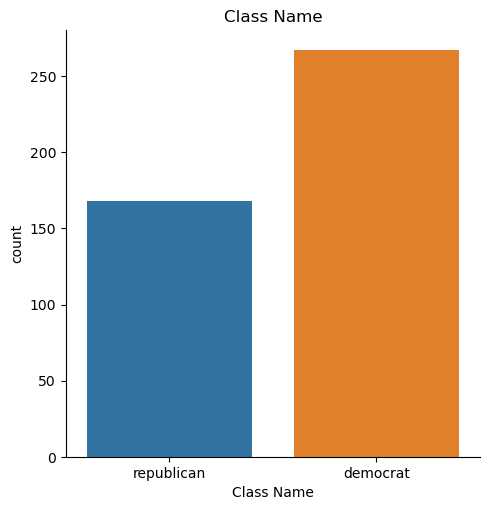

handicapped-infants
n    236
y    187
?     12
Name: count, dtype: int64


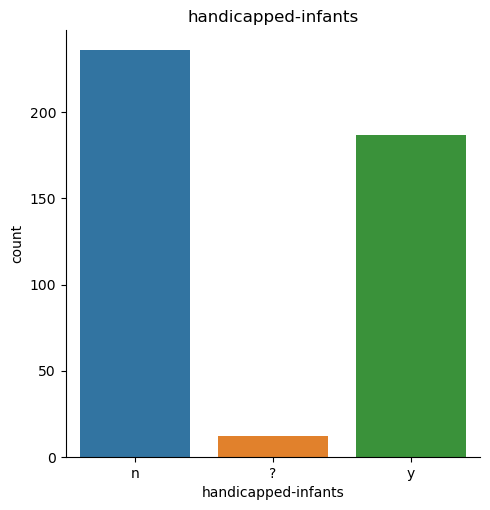

water-project-cost-sharing
y    195
n    192
?     48
Name: count, dtype: int64


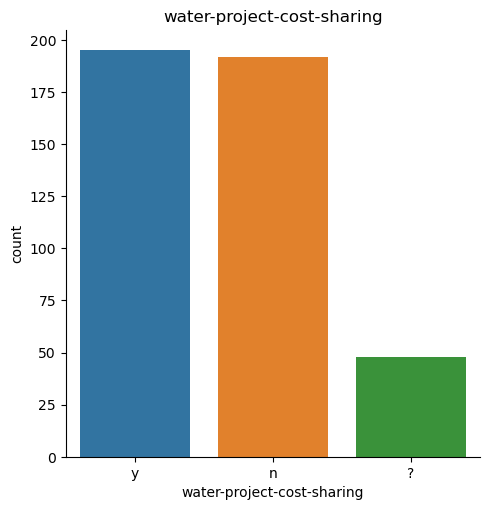

adoption-of-the-budget-resolution
y    253
n    171
?     11
Name: count, dtype: int64


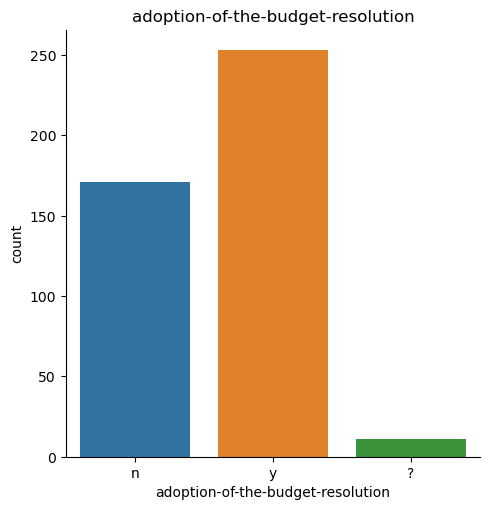

physician-fee-freeze
n    247
y    177
?     11
Name: count, dtype: int64


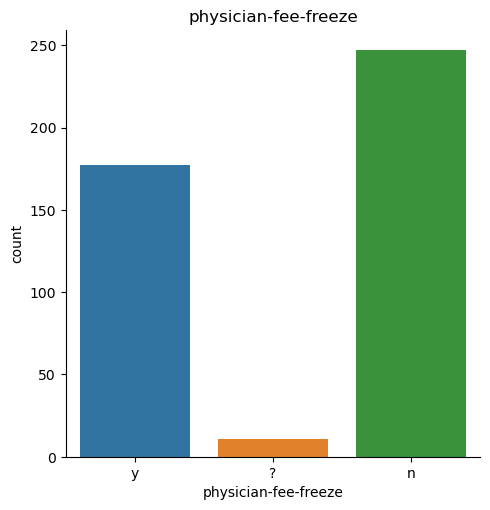

el-salvador-aid
y    212
n    208
?     15
Name: count, dtype: int64


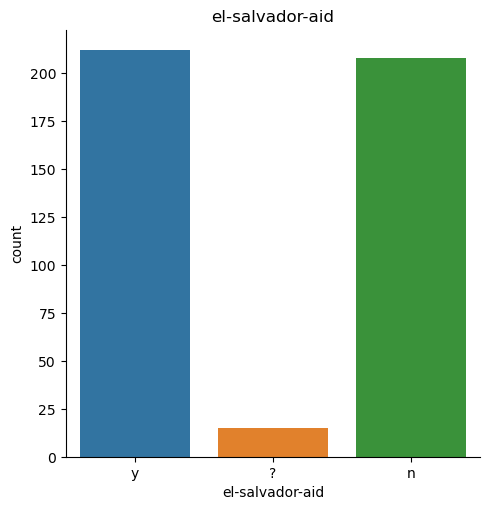

religious-groups-in-schools
y    272
n    152
?     11
Name: count, dtype: int64


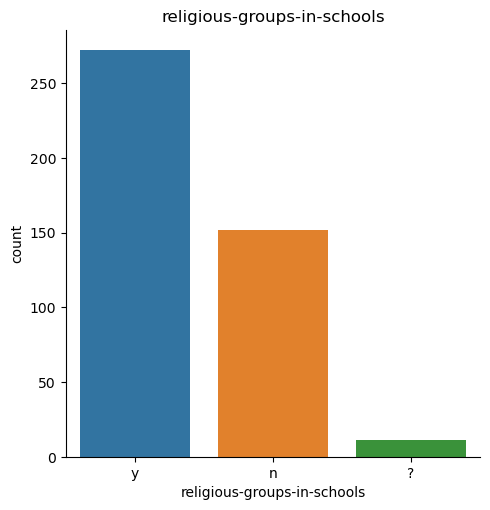

anti-satellite-test-ban
y    239
n    182
?     14
Name: count, dtype: int64


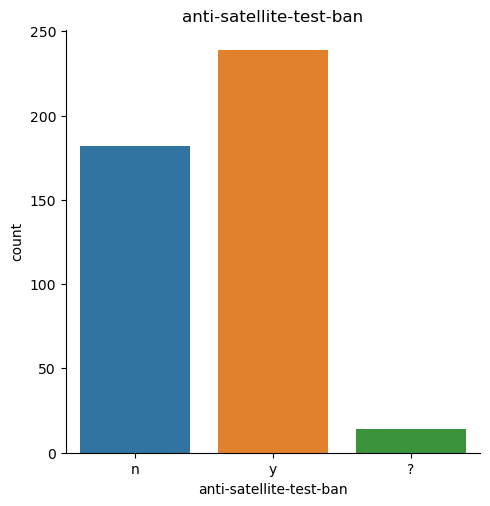

aid-to-nicaraguan-contras
y    242
n    178
?     15
Name: count, dtype: int64


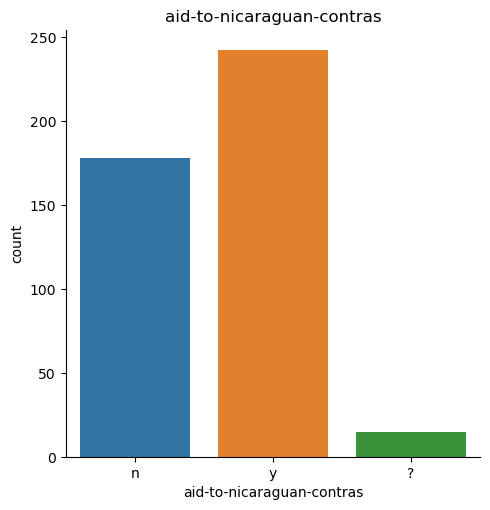

mx-missile
y    207
n    206
?     22
Name: count, dtype: int64


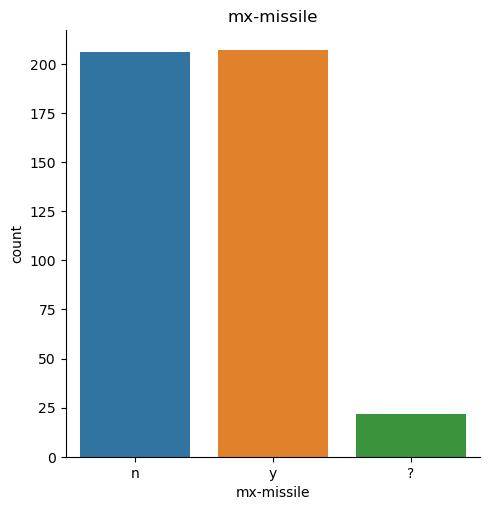

immigration
y    216
n    212
?      7
Name: count, dtype: int64


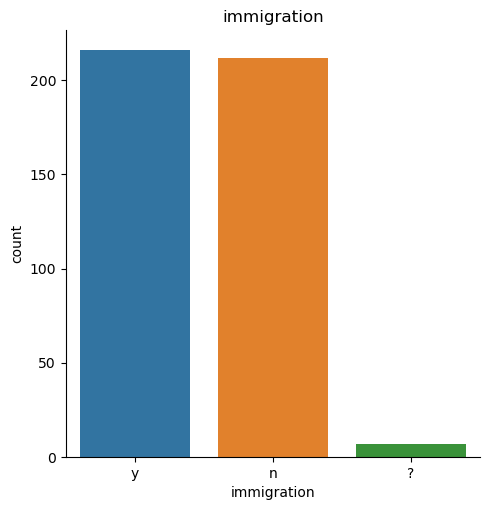

synfuels-corporation-cutback
n    264
y    150
?     21
Name: count, dtype: int64


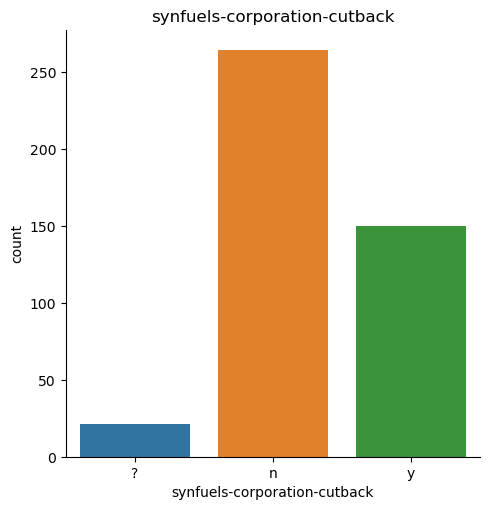

education-spending
n    233
y    171
?     31
Name: count, dtype: int64


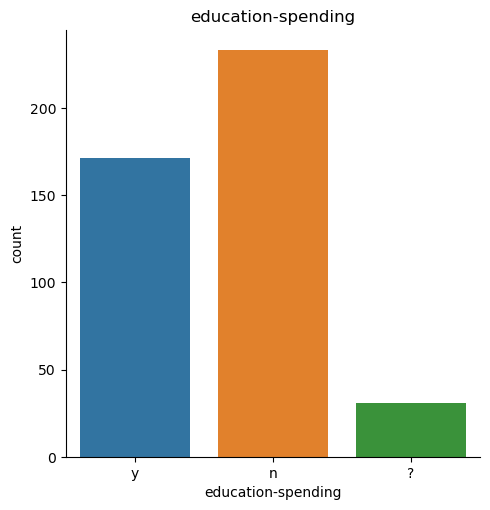

superfund-right-to-sue
y    209
n    201
?     25
Name: count, dtype: int64


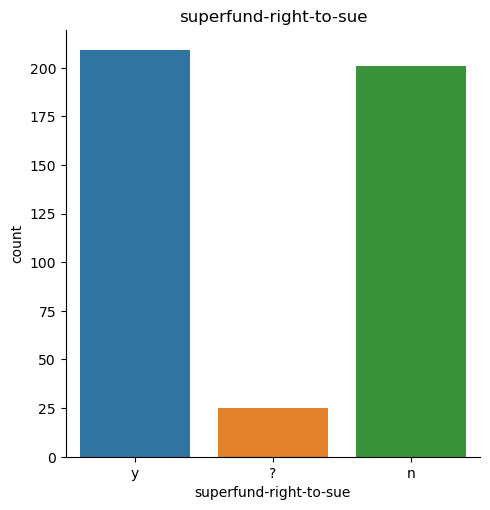

crime
y    248
n    170
?     17
Name: count, dtype: int64


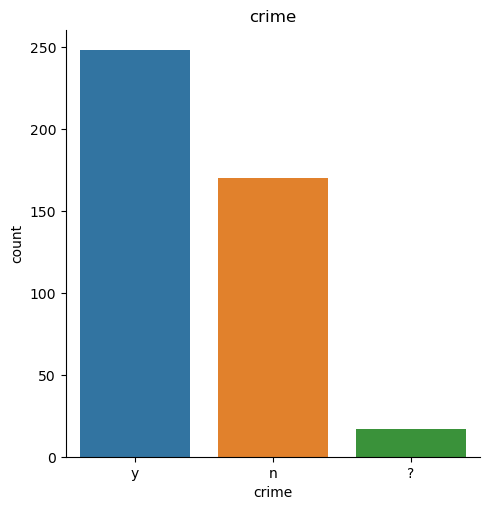

duty-free-exports
n    233
y    174
?     28
Name: count, dtype: int64


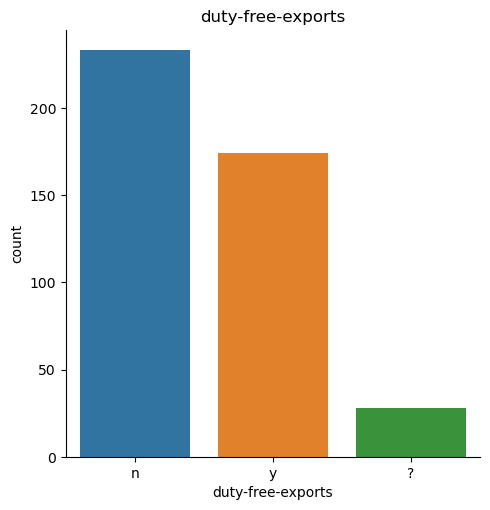

export-administration-act-south-africa
y    269
?    104
n     62
Name: count, dtype: int64


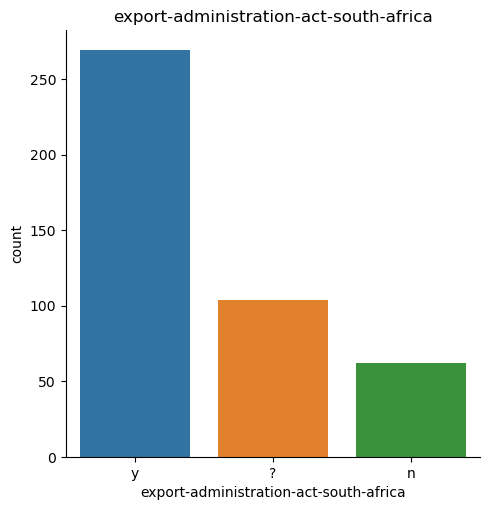

                                  Variable        Chi2       P-Value
0                               Class Name  430.791728  1.092871e-95
4                     physician-fee-freeze  363.039663  1.468720e-79
3        adoption-of-the-budget-resolution  237.935837  2.152234e-52
5                          el-salvador-aid  220.601360  1.250326e-48
12                      education-spending  206.135022  1.731206e-45
8                aid-to-nicaraguan-contras  189.581370  6.806575e-42
9                               mx-missile  171.887060  4.733682e-38
14                                   crime  163.314243  3.441618e-36
13                  superfund-right-to-sue  126.651197  3.148053e-28
15                       duty-free-exports  117.811326  2.615747e-26
7                  anti-satellite-test-ban  114.654844  1.267701e-25
6              religious-groups-in-schools   80.166321  3.909349e-18
1                      handicapped-infants   72.098473  2.208083e-16
16  export-administration-act-sout

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

df = pd.read_csv('./house-votes-84.csv')

print(df.columns)
df.columns = df.columns.str.strip()
df.columns

allowed_values = ['democrat', 'republican', 'y', 'n', '?']

if df.isin(allowed_values).all().all():
    print("All values in the DataFrame are allowed.")
else:
    print("The DataFrame contains disallowed values.")

for column in df.columns:
    print(df[column].value_counts())
    
    # Plot a categorical count plot for each column using Seaborn.
    sns.catplot(data=df, x=column, kind='count')
    plt.title(column)
    plt.show()

results_df = pd.DataFrame([(col, *chi2_contingency(pd.crosstab(df['Class Name'], df[col]))[:2]) for col in df.columns],
                          columns=['Variable', 'Chi2', 'P-Value']).sort_values(by='Chi2', ascending=False)
print(results_df)

In [78]:
df_encoding = df.drop(columns=['immigration', 'water-project-cost-sharing', 'Class Name'])
df_encoding

,handicapped-infants,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,n,n,y,y,y,n,n,n,?,y,y,y,n,y
1,n,n,y,y,y,n,n,n,n,y,y,y,n,?
2,?,y,?,y,y,n,n,n,y,n,y,y,n,n
3,n,y,n,?,y,n,n,n,y,n,y,n,n,y
4,y,y,n,y,y,n,n,n,y,?,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,n,y,y,y,y,n,n,y,n,y,y,y,n,y
431,n,y,n,n,n,y,y,y,n,n,n,n,n,y
432,n,n,y,y,y,n,n,n,y,y,y,y,n,y
433,n,n,y,y,y,?,?,?,n,y,y,y,n,y


In [79]:
df_encoding = pd.get_dummies(df_encoding)
df_encoding

,handicapped-infants_?,handicapped-infants_n,handicapped-infants_y,adoption-of-the-budget-resolution_?,adoption-of-the-budget-resolution_n,adoption-of-the-budget-resolution_y,physician-fee-freeze_?,physician-fee-freeze_n,physician-fee-freeze_y,el-salvador-aid_?,...,superfund-right-to-sue_y,crime_?,crime_n,crime_y,duty-free-exports_?,duty-free-exports_n,duty-free-exports_y,export-administration-act-south-africa_?,export-administration-act-south-africa_n,export-administration-act-south-africa_y
0,False,True,False,False,True,False,False,False,True,False,...,True,False,False,True,False,True,False,False,False,True
1,False,True,False,False,True,False,False,False,True,False,...,True,False,False,True,False,True,False,True,False,False
2,True,False,False,False,False,True,True,False,False,False,...,True,False,False,True,False,True,False,False,True,False
3,False,True,False,False,False,True,False,True,False,True,...,True,False,True,False,False,True,False,False,False,True
4,False,False,True,False,False,True,False,True,False,False,...,True,False,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,False,True,False,False,False,True,False,False,True,False,...,True,False,False,True,False,True,False,False,False,True
431,False,True,False,False,False,True,False,True,False,False,...,False,False,True,False,False,True,False,False,False,True
432,False,True,False,False,True,False,False,False,True,False,...,True,False,False,True,False,True,False,False,False,True
433,False,True,False,False,True,False,False,False,True,False,...,True,False,False,True,False,True,False,False,False,True


In [80]:
X = df_encoding.values
y = df['Class Name'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
print(Counter(df['Class Name']))
print()

print("Training instances ",len(X_train))
print("Training labels ",len(y_train))
# print(Counter(X_train)) # unhashable type: 'numpy.ndarray'
print(Counter(y_train))

print()
print("Test instances ",len(X_test))
print("Test labels:",len(y_test))
print(Counter(y_test))

Counter({'democrat': 267, 'republican': 168})

Training instances  348
Training labels  348
Counter({'democrat': 211, 'republican': 137})

Test instances  87
Test labels: 87
Counter({'democrat': 56, 'republican': 31})


In [82]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print('C =',svc.C)
print('kernel =',svc.kernel)

C = 1.0
kernel = rbf


In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    democrat       0.96      0.98      0.97        56
  republican       0.97      0.94      0.95        31

    accuracy                           0.97        87
   macro avg       0.97      0.96      0.96        87
weighted avg       0.97      0.97      0.97        87



All values in the DataFrame are allowed.
Class Name
democrat      267
republican    168
Name: count, dtype: int64


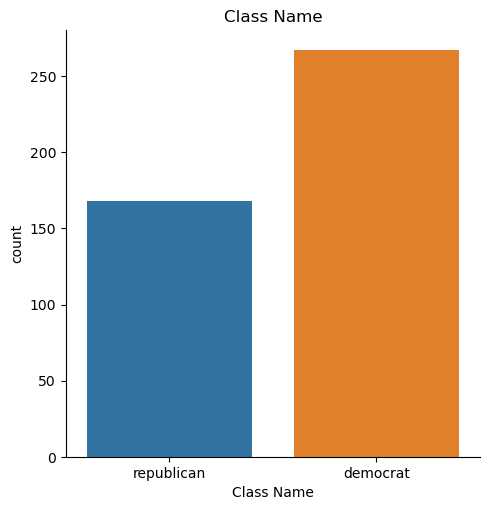

handicapped-infants
n    236
y    187
?     12
Name: count, dtype: int64


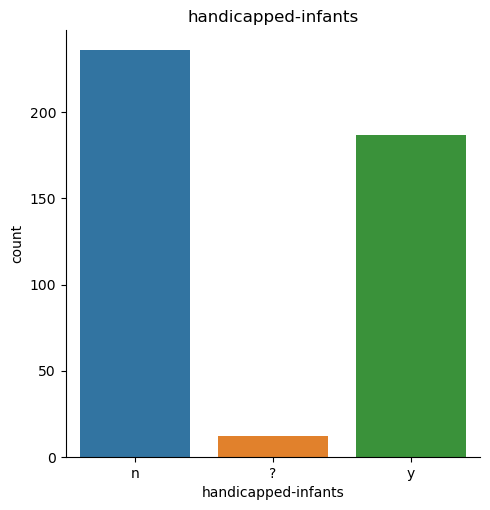

water-project-cost-sharing
y    195
n    192
?     48
Name: count, dtype: int64


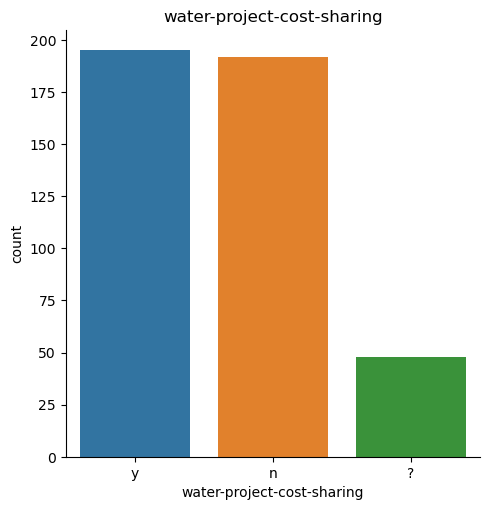

adoption-of-the-budget-resolution
y    253
n    171
?     11
Name: count, dtype: int64


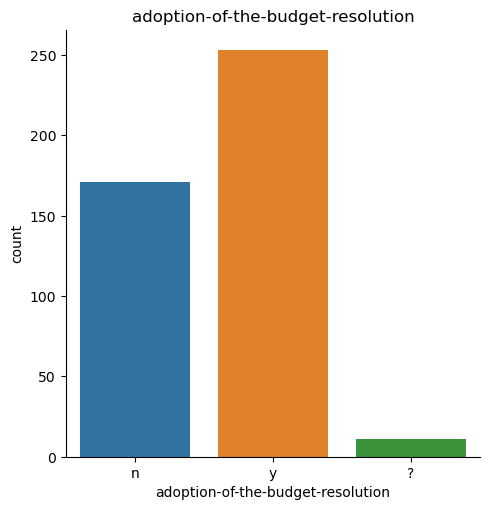

physician-fee-freeze
n    247
y    177
?     11
Name: count, dtype: int64


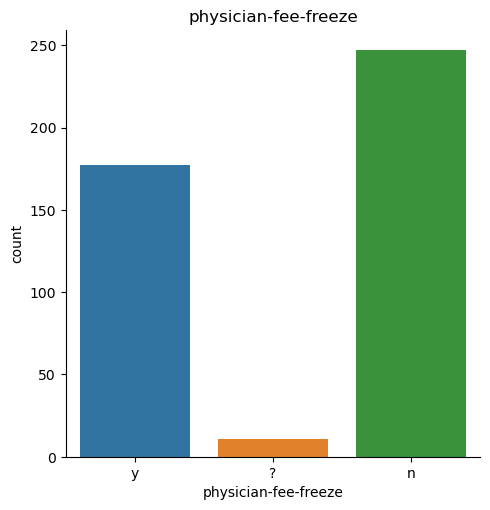

el-salvador-aid
y    212
n    208
?     15
Name: count, dtype: int64


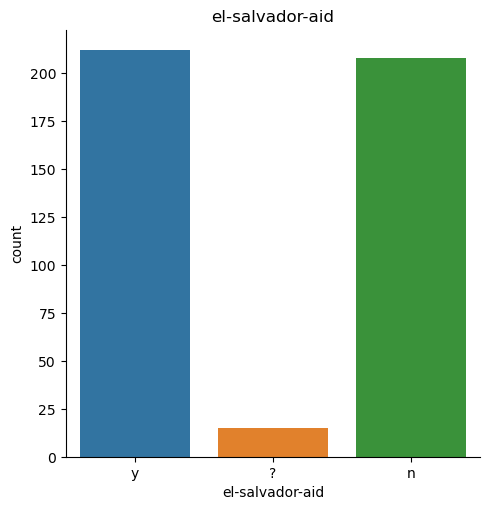

religious-groups-in-schools
y    272
n    152
?     11
Name: count, dtype: int64


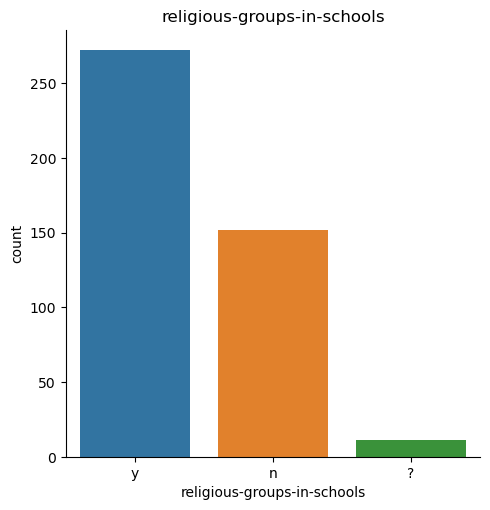

anti-satellite-test-ban
y    239
n    182
?     14
Name: count, dtype: int64


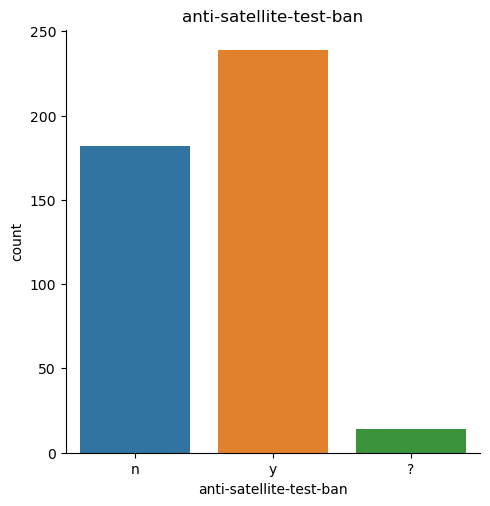

aid-to-nicaraguan-contras
y    242
n    178
?     15
Name: count, dtype: int64


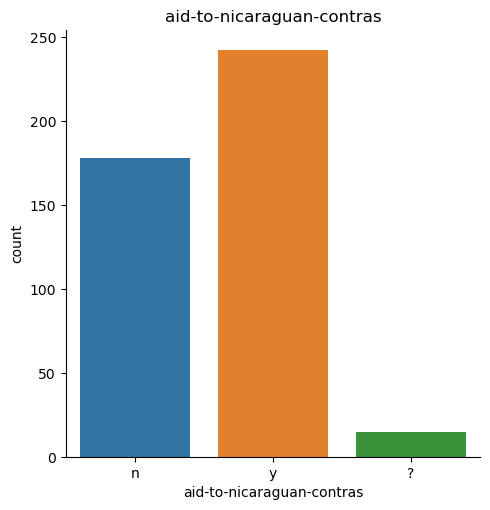

mx-missile
y    207
n    206
?     22
Name: count, dtype: int64


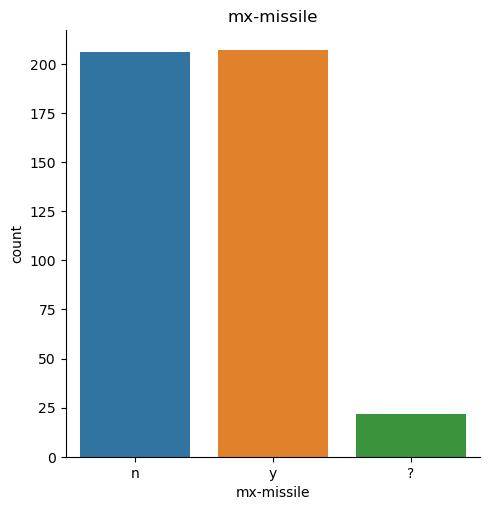

immigration
y    216
n    212
?      7
Name: count, dtype: int64


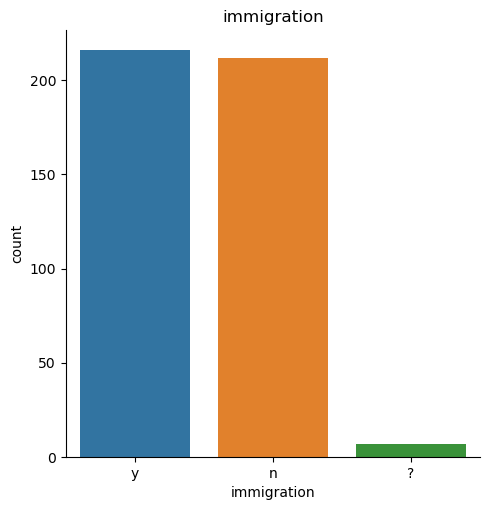

synfuels-corporation-cutback
n    264
y    150
?     21
Name: count, dtype: int64


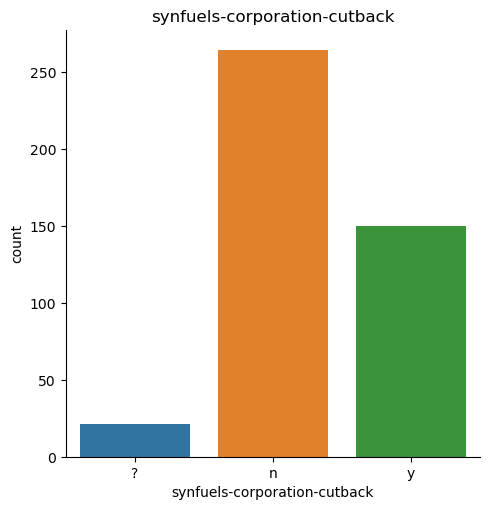

education-spending
n    233
y    171
?     31
Name: count, dtype: int64


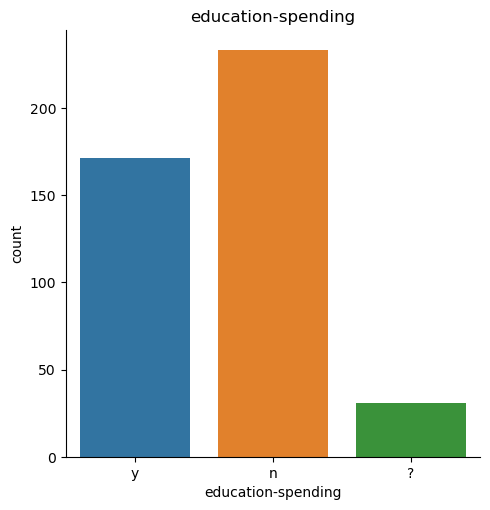

superfund-right-to-sue
y    209
n    201
?     25
Name: count, dtype: int64


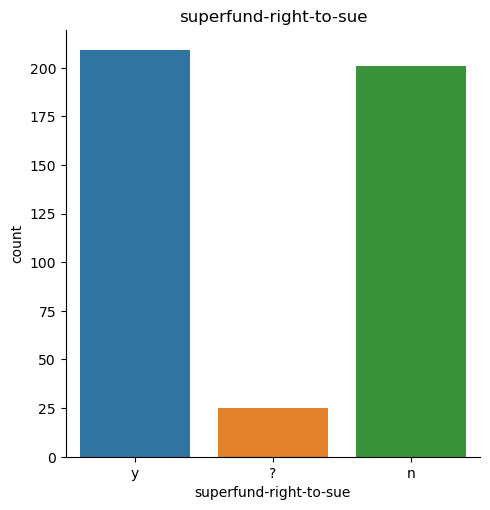

crime
y    248
n    170
?     17
Name: count, dtype: int64


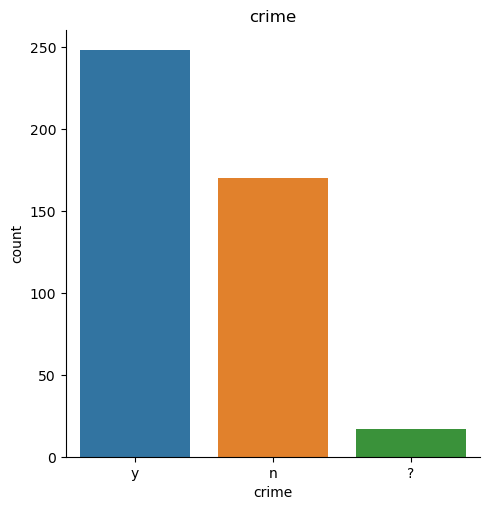

duty-free-exports
n    233
y    174
?     28
Name: count, dtype: int64


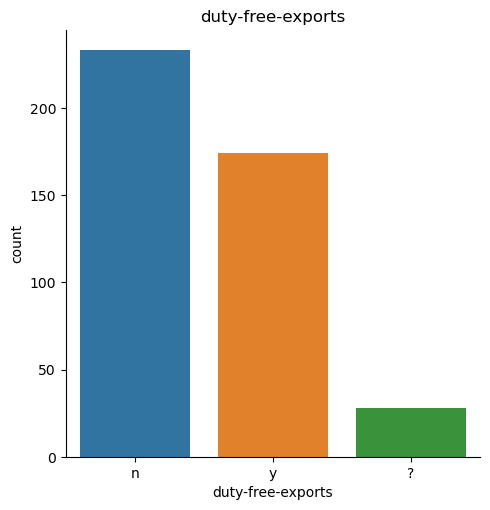

export-administration-act-south-africa
y    269
?    104
n     62
Name: count, dtype: int64


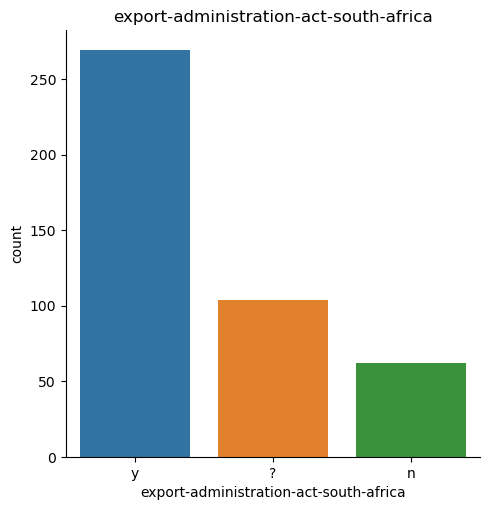

                                  Variable        Chi2       P-Value
0                               Class Name  430.791728  1.092871e-95
4                     physician-fee-freeze  363.039663  1.468720e-79
3        adoption-of-the-budget-resolution  237.935837  2.152234e-52
5                          el-salvador-aid  220.601360  1.250326e-48
12                      education-spending  206.135022  1.731206e-45
8                aid-to-nicaraguan-contras  189.581370  6.806575e-42
9                               mx-missile  171.887060  4.733682e-38
14                                   crime  163.314243  3.441618e-36
13                  superfund-right-to-sue  126.651197  3.148053e-28
15                       duty-free-exports  117.811326  2.615747e-26
7                  anti-satellite-test-ban  114.654844  1.267701e-25
6              religious-groups-in-schools   80.166321  3.909349e-18
1                      handicapped-infants   72.098473  2.208083e-16
16  export-administration-act-sout

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error

class UnionFind:
    def __init__(self, n):
        self.parent = list(range(n))
        self.rank = [0] * n
        self.min_point = [i for i in range(n)]

    def find(self, u):
        if self.parent[u] != u:
            self.parent[u] = self.find(self.parent[u])
        return self.parent[u]

    def union(self, u, v):
        root_u = self.find(u)
        root_v = self.find(v)
        if root_u != root_v:
            if self.rank[root_u] > self.rank[root_v]:
                self.parent[root_v] = root_u
                self.min_point[root_u] = min(self.min_point[root_u], self.min_point[root_v], key=lambda p: values[p])
            elif self.rank[root_u] < self.rank[root_v]:
                self.parent[root_u] = root_v
                self.min_point[root_v] = min(self.min_point[root_u], self.min_point[root_v], key=lambda p: values[p])
            else:
                self.parent[root_v] = root_u
                self.rank[root_u] += 1
                self.min_point[root_u] = min(self.min_point[root_u], self.min_point[root_v], key=lambda p: values[p])

    def find_min(self, u):
        return self.min_point[self.find(u)]

df = pd.read_csv('./house-votes-84.csv')
df.columns = df.columns.str.strip()
allowed_values = ['democrat', 'republican', 'y', 'n', '?']
if df.isin(allowed_values).all().all():
    print("All values in the DataFrame are allowed.")
else:
    print("The DataFrame contains disallowed values.")
for column in df.columns:
    print(df[column].value_counts())
    sns.catplot(data=df, x=column, kind='count')
    plt.title(column)
    plt.show()
results_df = pd.DataFrame([(col, *chi2_contingency(pd.crosstab(df['Class Name'], df[col]))[:2]) for col in df.columns],
                          columns=['Variable', 'Chi2', 'P-Value']).sort_values(by='Chi2', ascending=False)
print(results_df)
df_encoding = df.drop(columns=['immigration', 'water-project-cost-sharing', 'Class Name'])
df_encoding = pd.get_dummies(df_encoding)
X = df_encoding.values
y = df['Class Name'].values
y = np.where(y == 'democrat', 1, 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(Counter(df['Class Name']))
print()
print("Training instances:", len(X_train))
print("Training labels:", len(y_train))
print(Counter(y_train))
print()
print("Test instances:", len(X_test))
print("Test labels:", len(y_test))
print(Counter(y_test))
svc_no_penalty = SVC(kernel='linear')
svc_no_penalty.fit(X_train, y_train)
y_pred_no_penalty = svc_no_penalty.predict(X_test)

values = svc_no_penalty.decision_function(X_train)
sorted_indices = np.argsort(values)
uf = UnionFind(len(X_train))
pairings_f = []

for i, p in enumerate(X_train):
    u = sorted_indices[i]
    if i > 0:
        v = sorted_indices[i - 1]
        uf.union(u, v)
        min_v = uf.find_min(v)
        if values[min_v] <= 0 and values[u] >= 0:
            pairings_f.append((min_v, u))

critical_pairs = pairings_f
valid_critical_pairs = [(p1, p2) for p1, p2 in critical_pairs if p1 < len(X_train) and p2 < len(X_train)]
robustness = [min(abs(values[p1]), abs(values[p2])) for p1, p2 in valid_critical_pairs]

def gradient_descent(X, y, svm, lambda_, learning_rate=0.01, num_iterations=100):
    w = np.array([1.0])
    for i in range(num_iterations):
        svm.set_params(C=w[0])
        svm.fit(X, y)
        values = svm.decision_function(X)
        robustness = [min(abs(values[p1]), abs(values[p2])) for p1, p2 in valid_critical_pairs]
        grad = np.array([2 * r * values[p] for p, r in zip(np.hstack(valid_critical_pairs), robustness) if p < len(X)]).sum()
        w -= learning_rate * grad
    return w

lambda_ = 0.1
learning_rate = 0.01
num_iterations = 100
optimal_w = gradient_descent(X_train, y_train, svc_no_penalty, lambda_, learning_rate, num_iterations)
svc_penalty = SVC(kernel='rbf', C=optimal_w[0], gamma='scale')
svc_penalty.fit(X_train, y_train)

print("\nSVM without Topological Penalty:")
print(classification_report(y_test, y_pred_no_penalty))
print(confusion_matrix(y_test, y_pred_no_penalty))

y_pred_penalty = svc_penalty.predict(X_test)
print("\nSVM with Topological Penalty:")
print(classification_report(y_test, y_pred_penalty))
print(confusion_matrix(y_test, y_pred_penalty))

mean_error_rate_no_penalty = mean_squared_error(y_test, y_pred_no_penalty)
mean_error_rate_penalty = mean_squared_error(y_test, y_pred_penalty)

print("\nMean Error Rate without Topological Penalty:", mean_error_rate_no_penalty)
print("Mean Error Rate with Topological Penalty:", mean_error_rate_penalty)

All values in the DataFrame are allowed.
Class Name
democrat      267
republican    168
Name: count, dtype: int64


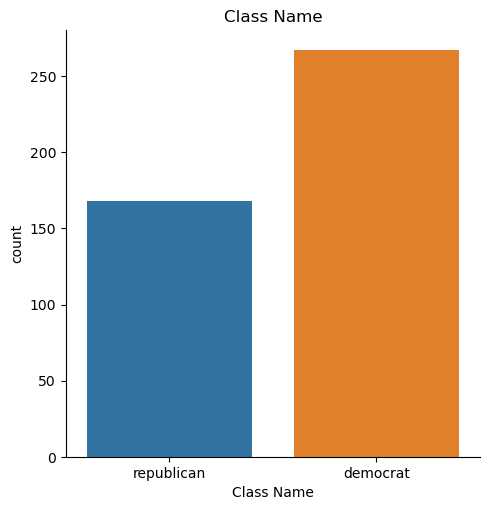

handicapped-infants
n    236
y    187
?     12
Name: count, dtype: int64


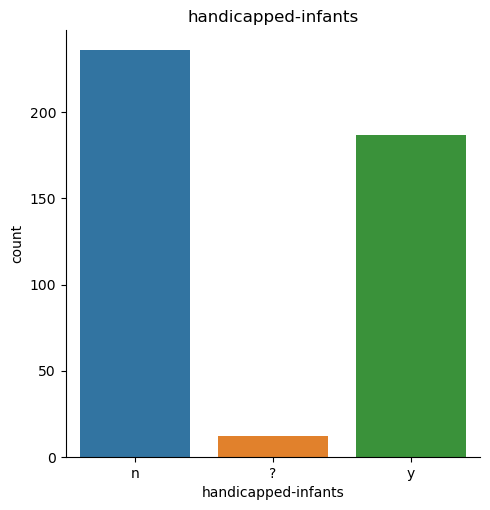

water-project-cost-sharing
y    195
n    192
?     48
Name: count, dtype: int64


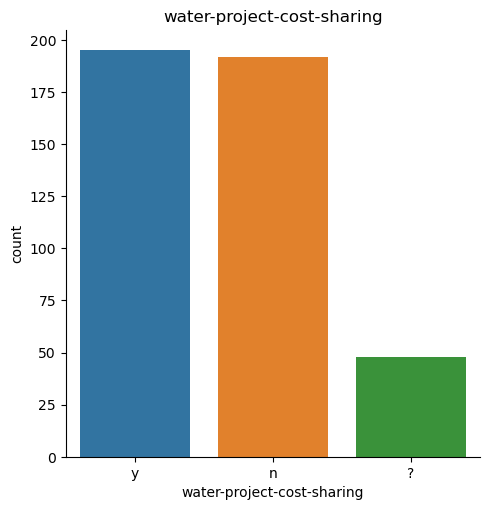

adoption-of-the-budget-resolution
y    253
n    171
?     11
Name: count, dtype: int64


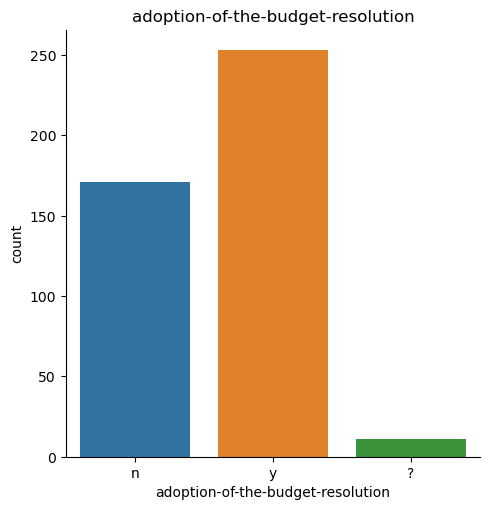

physician-fee-freeze
n    247
y    177
?     11
Name: count, dtype: int64


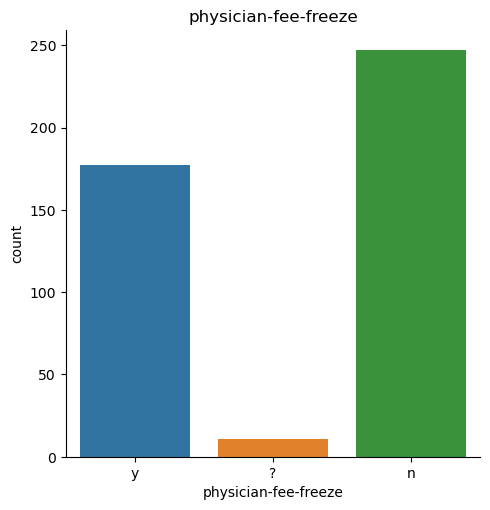

el-salvador-aid
y    212
n    208
?     15
Name: count, dtype: int64


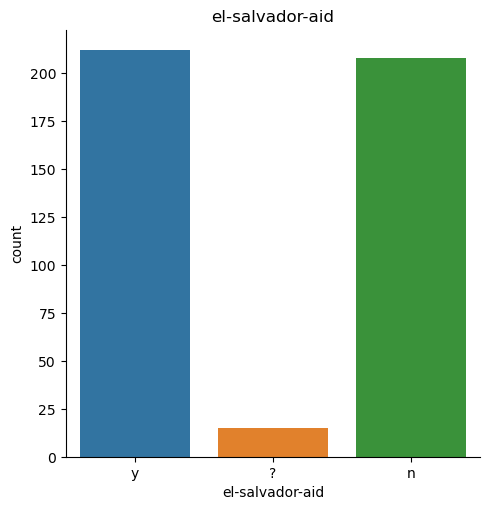

religious-groups-in-schools
y    272
n    152
?     11
Name: count, dtype: int64


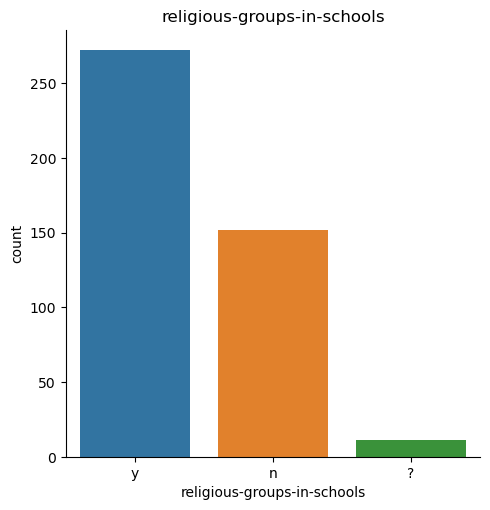

anti-satellite-test-ban
y    239
n    182
?     14
Name: count, dtype: int64


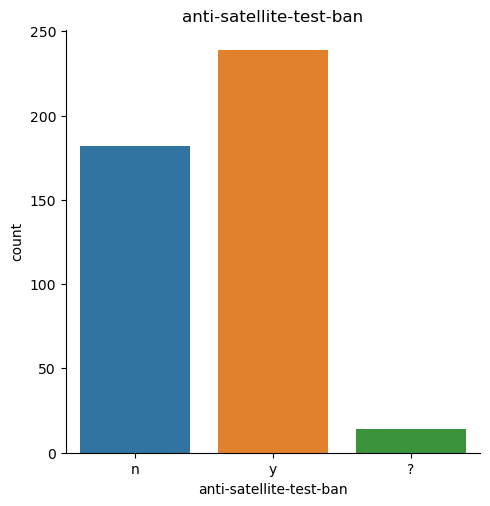

aid-to-nicaraguan-contras
y    242
n    178
?     15
Name: count, dtype: int64


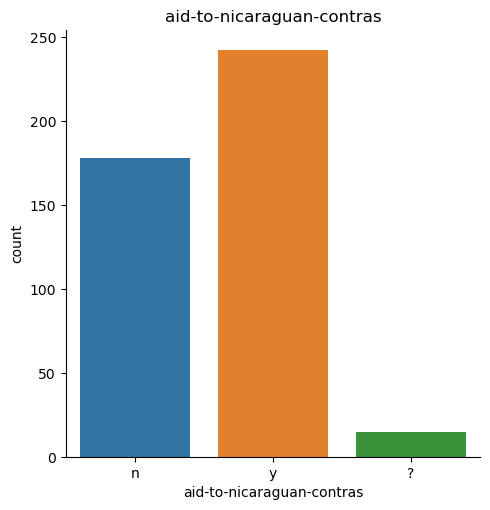

mx-missile
y    207
n    206
?     22
Name: count, dtype: int64


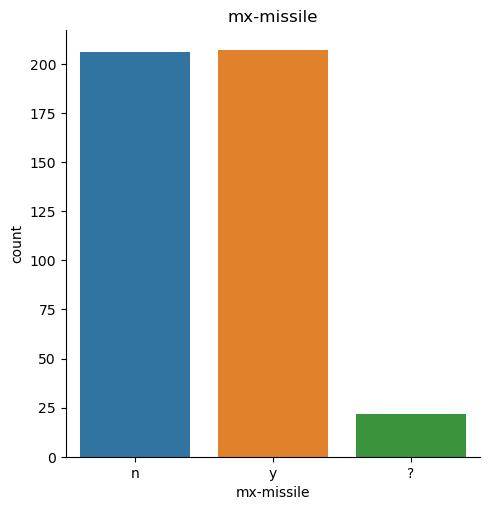

immigration
y    216
n    212
?      7
Name: count, dtype: int64


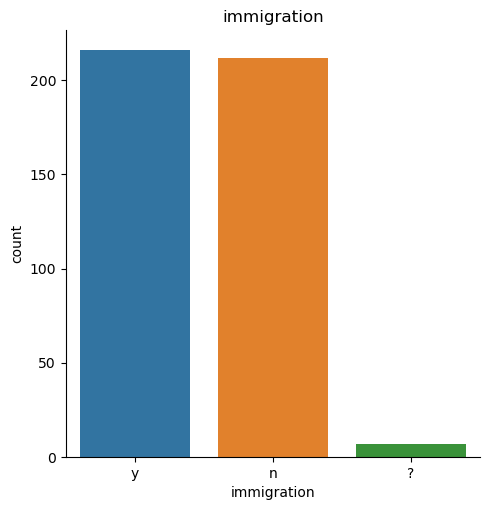

synfuels-corporation-cutback
n    264
y    150
?     21
Name: count, dtype: int64


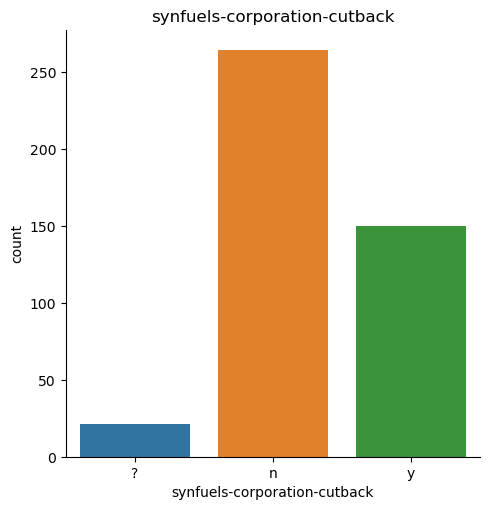

education-spending
n    233
y    171
?     31
Name: count, dtype: int64


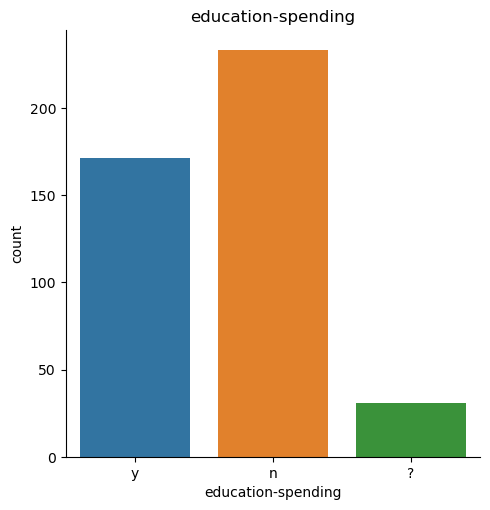

superfund-right-to-sue
y    209
n    201
?     25
Name: count, dtype: int64


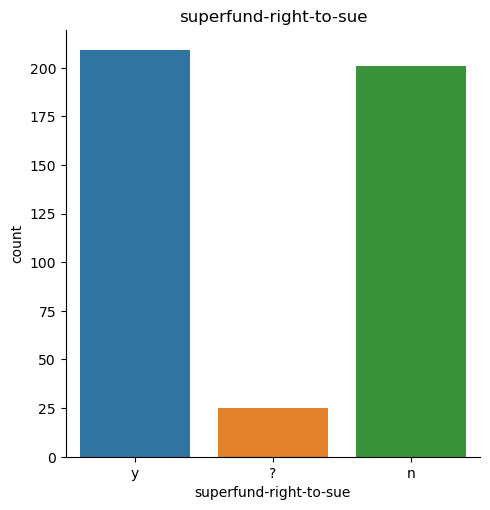

crime
y    248
n    170
?     17
Name: count, dtype: int64


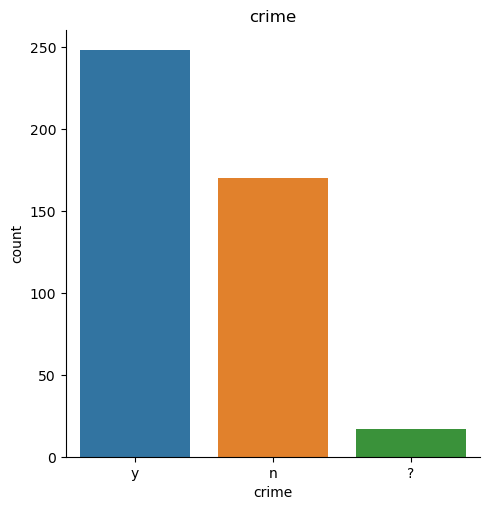

duty-free-exports
n    233
y    174
?     28
Name: count, dtype: int64


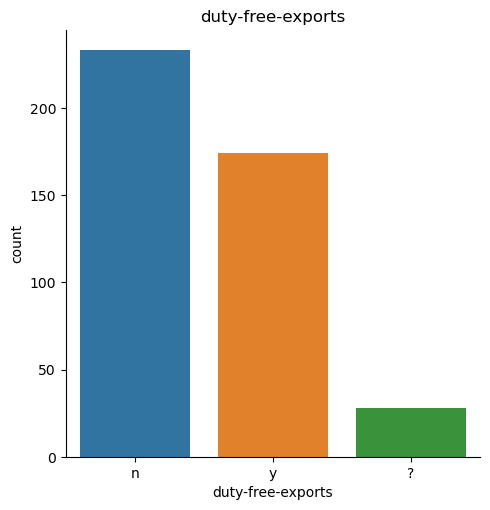

export-administration-act-south-africa
y    269
?    104
n     62
Name: count, dtype: int64


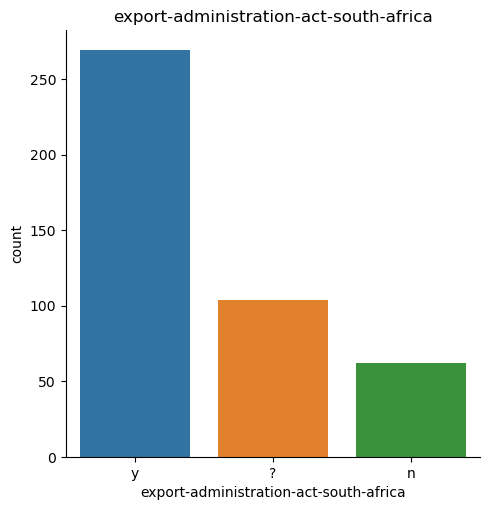

                                  Variable        Chi2       P-Value
0                               Class Name  430.791728  1.092871e-95
4                     physician-fee-freeze  363.039663  1.468720e-79
3        adoption-of-the-budget-resolution  237.935837  2.152234e-52
5                          el-salvador-aid  220.601360  1.250326e-48
12                      education-spending  206.135022  1.731206e-45
8                aid-to-nicaraguan-contras  189.581370  6.806575e-42
9                               mx-missile  171.887060  4.733682e-38
14                                   crime  163.314243  3.441618e-36
13                  superfund-right-to-sue  126.651197  3.148053e-28
15                       duty-free-exports  117.811326  2.615747e-26
7                  anti-satellite-test-ban  114.654844  1.267701e-25
6              religious-groups-in-schools   80.166321  3.909349e-18
1                      handicapped-infants   72.098473  2.208083e-16
16  export-administration-act-sout

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error

class UnionFind:
    def __init__(self, n):
        self.parent = list(range(n))
        self.rank = [0] * n
        self.min_point = [i for i in range(n)]

    def find(self, u):
        if self.parent[u] != u:
            self.parent[u] = self.find(self.parent[u])
        return self.parent[u]

    def union(self, u, v):
        root_u = self.find(u)
        root_v = self.find(v)
        if root_u != root_v:
            if self.rank[root_u] > self.rank[root_v]:
                self.parent[root_v] = root_u
                self.min_point[root_u] = min(self.min_point[root_u], self.min_point[root_v], key=lambda p: values[p])
            elif self.rank[root_u] < self.rank[root_v]:
                self.parent[root_u] = root_v
                self.min_point[root_v] = min(self.min_point[root_u], self.min_point[root_v], key=lambda p: values[p])
            else:
                self.parent[root_v] = root_u
                self.rank[root_u] += 1
                self.min_point[root_u] = min(self.min_point[root_u], self.min_point[root_v], key=lambda p: values[p])

    def find_min(self, u):
        return self.min_point[self.find(u)]

df = pd.read_csv('./house-votes-84.csv')
df.columns = df.columns.str.strip()

allowed_values = ['democrat', 'republican', 'y', 'n', '?']
if df.isin(allowed_values).all().all():
    print("All values in the DataFrame are allowed.")
else:
    print("The DataFrame contains disallowed values.")

for column in df.columns:
    print(df[column].value_counts())
    sns.catplot(data=df, x=column, kind='count')
    plt.title(column)
    plt.show()

results_df = pd.DataFrame([(col, *chi2_contingency(pd.crosstab(df['Class Name'], df[col]))[:2]) for col in df.columns],
                          columns=['Variable', 'Chi2', 'P-Value']).sort_values(by='Chi2', ascending=False)
print(results_df)

df_encoding = df.drop(columns=['immigration', 'water-project-cost-sharing', 'Class Name'])
df_encoding = pd.get_dummies(df_encoding)

X = df_encoding.values
y = df['Class Name'].values
y = np.where(y == 'democrat', 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(Counter(df['Class Name']))
print()
print("Training instances:", len(X_train))
print("Training labels:", len(y_train))
print(Counter(y_train))
print()
print("Test instances:", len(X_test))
print("Test labels:", len(y_test))
print(Counter(y_test))

svc_no_penalty = SVC(kernel='linear')
svc_no_penalty.fit(X_train, y_train)
y_pred_no_penalty = svc_no_penalty.predict(X_test)

values = svc_no_penalty.decision_function(X_train)
sorted_indices = np.argsort(values)
uf = UnionFind(len(X_train))
pairings_f = []

for i, p in enumerate(X_train):
    u = sorted_indices[i]
    if i > 0:
        v = sorted_indices[i - 1]
        uf.union(u, v)
        min_v = uf.find_min(v)
        if values[min_v] <= 0 and values[u] >= 0:
            pairings_f.append((min_v, u))

critical_pairs = pairings_f
valid_critical_pairs = [(p1, p2) for p1, p2 in critical_pairs if p1 < len(X_train) and p2 < len(X_train)]
robustness = [min(abs(values[p1]), abs(values[p2])) for p1, p2 in valid_critical_pairs]

# Function for gradient descent with topological penalty
def gradient_descent(X, y, svm, lambda_, learning_rate=0.01, num_iterations=100):
    w = np.array([1.0])
    for i in range(num_iterations):
        svm.set_params(C=w[0])
        svm.fit(X, y)
        values = svm.decision_function(X)
        robustness = [min(abs(values[p1]), abs(values[p2])) for p1, p2 in valid_critical_pairs]
        grad = np.array([2 * r * values[p] for p, r in zip(np.hstack(valid_critical_pairs), robustness) if p < len(X)]).sum()
        w -= learning_rate * grad
    return w

lambda_ = 0.1
learning_rate = 0.01
num_iterations = 100
optimal_w = gradient_descent(X_train, y_train, svc_no_penalty, lambda_, learning_rate, num_iterations)
svc_penalty = SVC(kernel='linear', C=optimal_w[0], gamma='scale')
svc_penalty.fit(X_train, y_train)

# L2 Penalty Model
svc_l2 = SGDClassifier(loss='hinge', penalty='l2', max_iter=1000, tol=1e-3, random_state=42)
svc_l2.fit(X_train, y_train)
y_pred_l2 = svc_l2.predict(X_test)

# L1 Penalty Model
svc_l1 = SGDClassifier(loss='hinge', penalty='l1', max_iter=1000, tol=1e-3, random_state=42)
svc_l1.fit(X_train, y_train)
y_pred_l1 = svc_l1.predict(X_test)

print("\nSVM without Penalty:")
print(classification_report(y_test, y_pred_no_penalty))
print(confusion_matrix(y_test, y_pred_no_penalty))

print("\nSVM with Topological Penalty:")
print(classification_report(y_test, y_pred_penalty))
print(confusion_matrix(y_test, y_pred_penalty))

print("\nSVM with L2 Penalty:")
print(classification_report(y_test, y_pred_l2))
print(confusion_matrix(y_test, y_pred_l2))

print("\nSVM with L1 Penalty:")
print(classification_report(y_test, y_pred_l1))
print(confusion_matrix(y_test, y_pred_l1))

mean_error_rate_no_penalty = mean_squared_error(y_test, y_pred_no_penalty)
mean_error_rate_penalty = mean_squared_error(y_test, y_pred_penalty)
mean_error_rate_l2 = mean_squared_error(y_test, y_pred_l2)
mean_error_rate_l1 = mean_squared_error(y_test, y_pred_l1)

print("\nMean Error Rate without Penalty:", mean_error_rate_no_penalty)
print("Mean Error Rate with Topological Penalty:", mean_error_rate_penalty)
print("Mean Error Rate with L2 Penalty:", mean_error_rate_l2)
print("Mean Error Rate with L1 Penalty:", mean_error_rate_l1)


All values in the DataFrame are allowed.
Class Name
democrat      267
republican    168
Name: count, dtype: int64


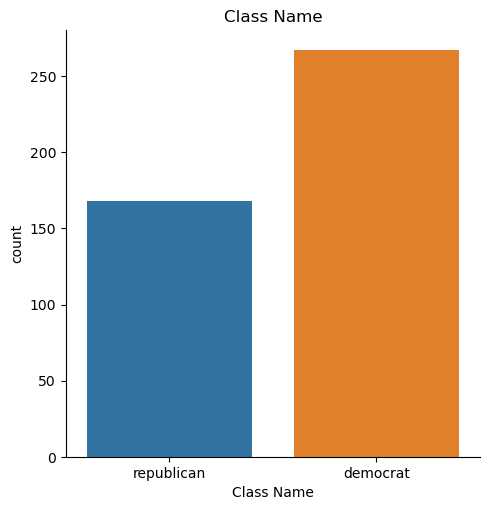

handicapped-infants
n    236
y    187
?     12
Name: count, dtype: int64


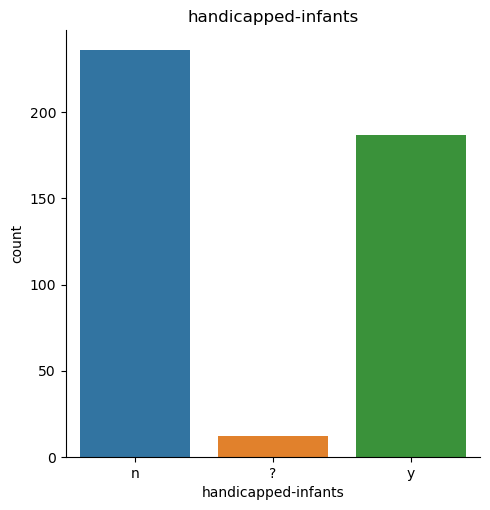

water-project-cost-sharing
y    195
n    192
?     48
Name: count, dtype: int64


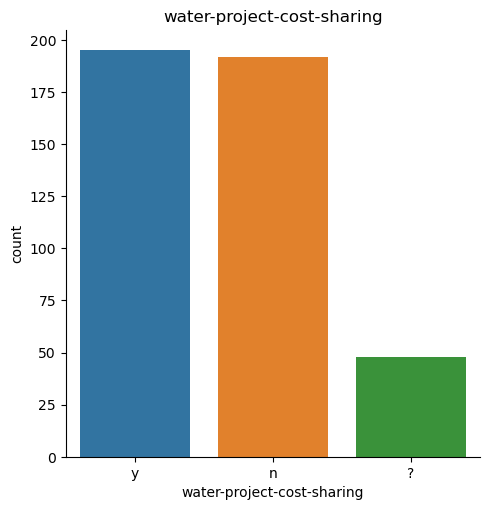

adoption-of-the-budget-resolution
y    253
n    171
?     11
Name: count, dtype: int64


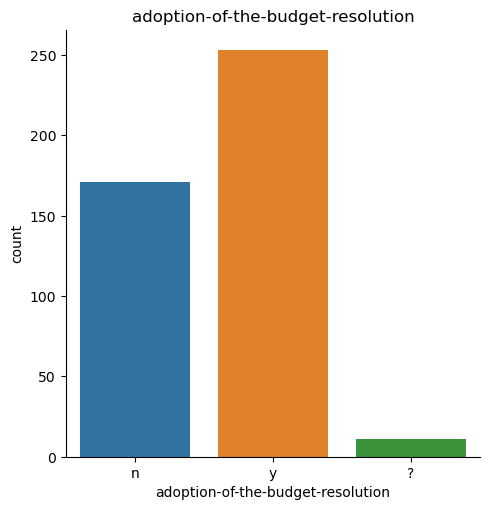

physician-fee-freeze
n    247
y    177
?     11
Name: count, dtype: int64


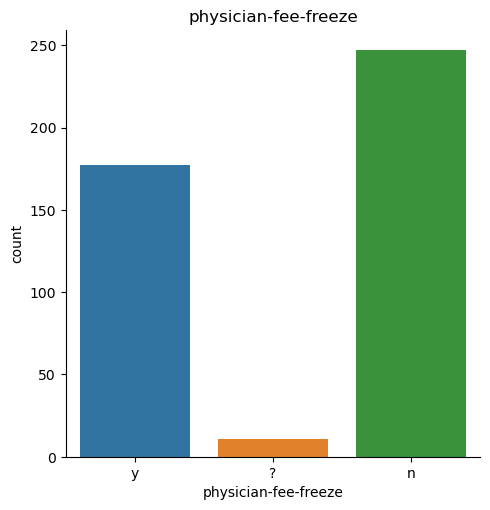

el-salvador-aid
y    212
n    208
?     15
Name: count, dtype: int64


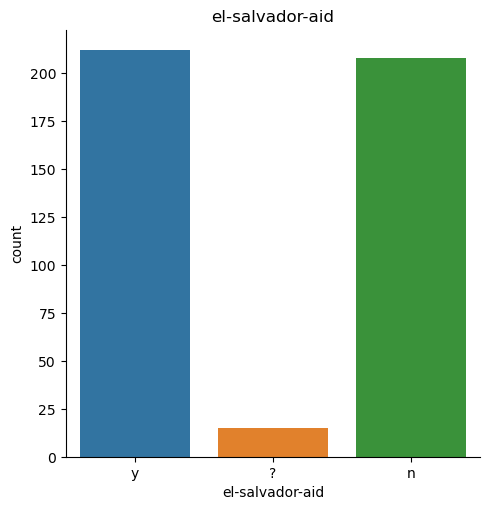

religious-groups-in-schools
y    272
n    152
?     11
Name: count, dtype: int64


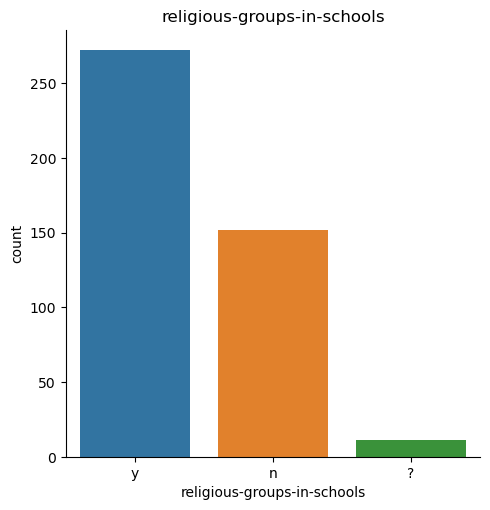

anti-satellite-test-ban
y    239
n    182
?     14
Name: count, dtype: int64


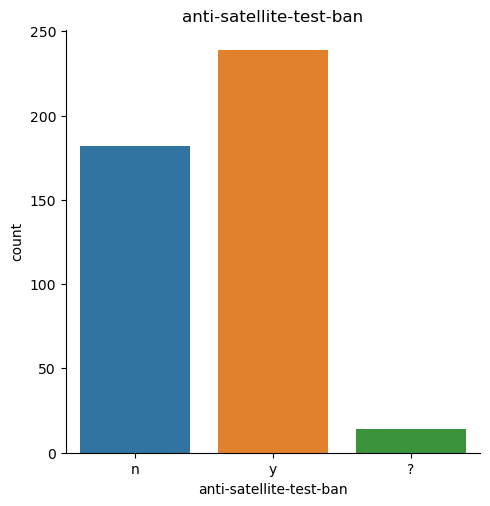

aid-to-nicaraguan-contras
y    242
n    178
?     15
Name: count, dtype: int64


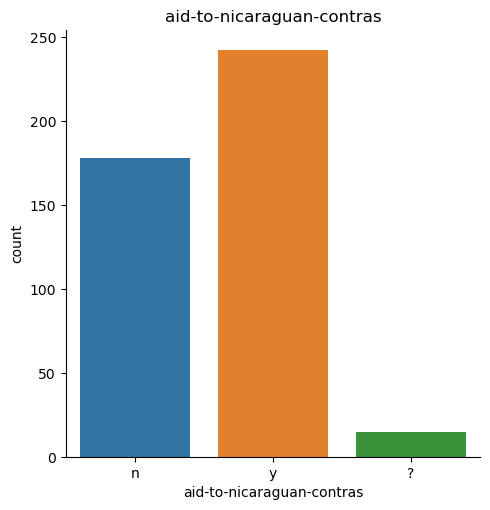

mx-missile
y    207
n    206
?     22
Name: count, dtype: int64


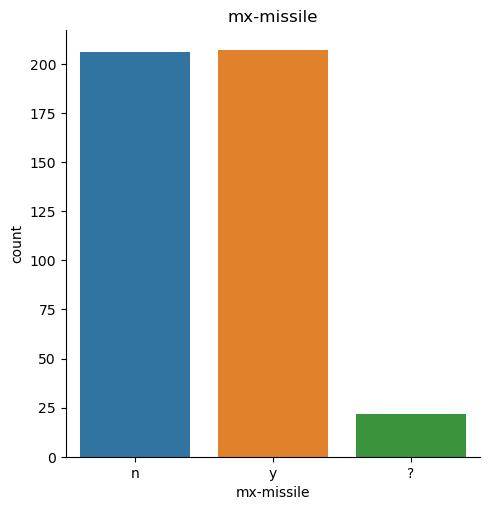

immigration
y    216
n    212
?      7
Name: count, dtype: int64


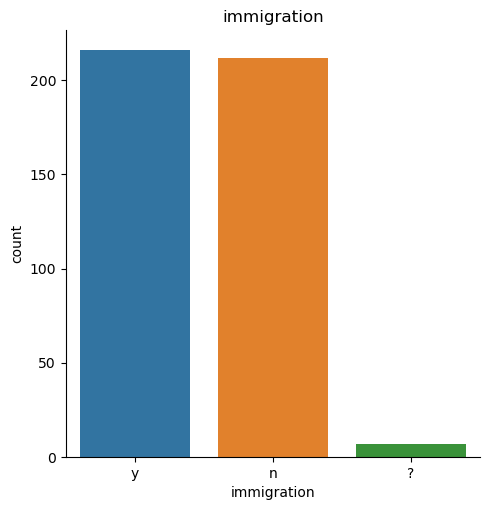

synfuels-corporation-cutback
n    264
y    150
?     21
Name: count, dtype: int64


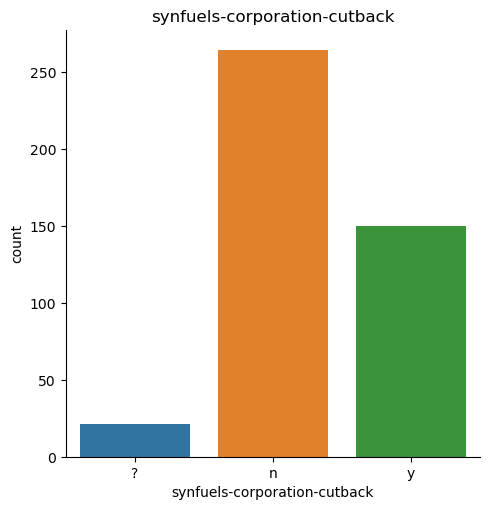

education-spending
n    233
y    171
?     31
Name: count, dtype: int64


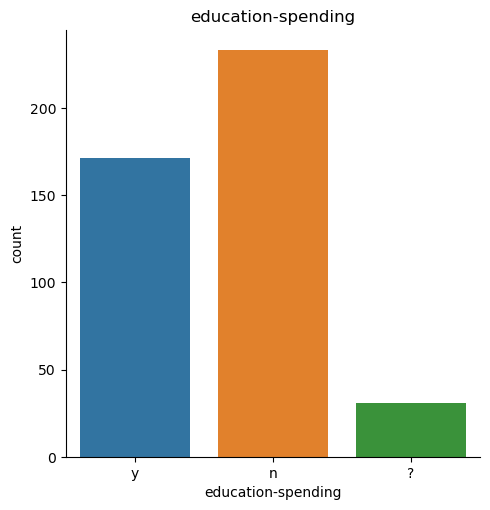

superfund-right-to-sue
y    209
n    201
?     25
Name: count, dtype: int64


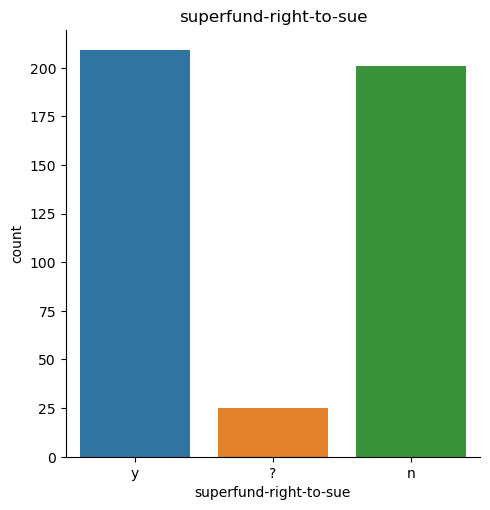

crime
y    248
n    170
?     17
Name: count, dtype: int64


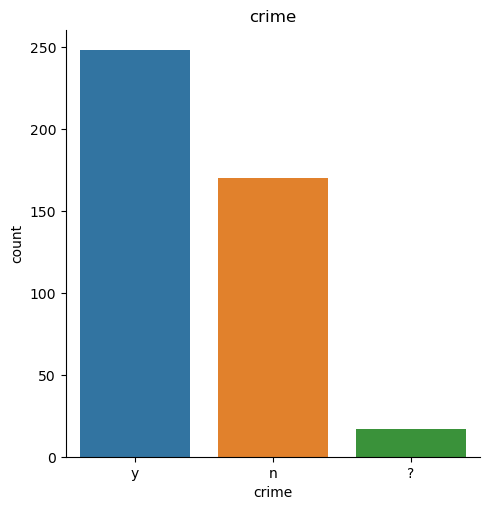

duty-free-exports
n    233
y    174
?     28
Name: count, dtype: int64


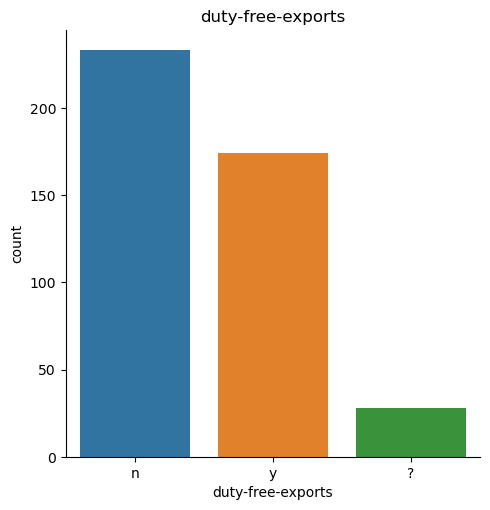

export-administration-act-south-africa
y    269
?    104
n     62
Name: count, dtype: int64


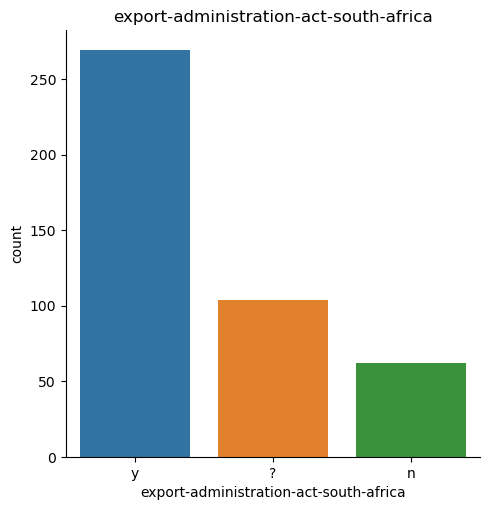

                                  Variable        Chi2       P-Value
0                               Class Name  430.791728  1.092871e-95
4                     physician-fee-freeze  363.039663  1.468720e-79
3        adoption-of-the-budget-resolution  237.935837  2.152234e-52
5                          el-salvador-aid  220.601360  1.250326e-48
12                      education-spending  206.135022  1.731206e-45
8                aid-to-nicaraguan-contras  189.581370  6.806575e-42
9                               mx-missile  171.887060  4.733682e-38
14                                   crime  163.314243  3.441618e-36
13                  superfund-right-to-sue  126.651197  3.148053e-28
15                       duty-free-exports  117.811326  2.615747e-26
7                  anti-satellite-test-ban  114.654844  1.267701e-25
6              religious-groups-in-schools   80.166321  3.909349e-18
1                      handicapped-infants   72.098473  2.208083e-16
16  export-administration-act-sout

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error

class UnionFind:
    def __init__(self, n):
        self.parent = list(range(n))
        self.rank = [0] * n
        self.min_point = [i for i in range(n)]

    def find(self, u):
        if self.parent[u] != u:
            self.parent[u] = self.find(self.parent[u])
        return self.parent[u]

    def union(self, u, v):
        root_u = self.find(u)
        root_v = self.find(v)
        if root_u != root_v:
            if self.rank[root_u] > self.rank[root_v]:
                self.parent[root_v] = root_u
                self.min_point[root_u] = min(self.min_point[root_u], self.min_point[root_v], key=lambda p: values[p])
            elif self.rank[root_u] < self.rank[root_v]:
                self.parent[root_u] = root_v
                self.min_point[root_v] = min(self.min_point[root_u], self.min_point[root_v], key=lambda p: values[p])
            else:
                self.parent[root_v] = root_u
                self.rank[root_u] += 1
                self.min_point[root_u] = min(self.min_point[root_u], self.min_point[root_v], key=lambda p: values[p])

    def find_min(self, u):
        return self.min_point[self.find(u)]

df = pd.read_csv('./house-votes-84.csv')
df.columns = df.columns.str.strip()

allowed_values = ['democrat', 'republican', 'y', 'n', '?']
if df.isin(allowed_values).all().all():
    print("All values in the DataFrame are allowed.")
else:
    print("The DataFrame contains disallowed values.")

for column in df.columns:
    print(df[column].value_counts())
    sns.catplot(data=df, x=column, kind='count')
    plt.title(column)
    plt.show()

results_df = pd.DataFrame([(col, *chi2_contingency(pd.crosstab(df['Class Name'], df[col]))[:2]) for col in df.columns],
                          columns=['Variable', 'Chi2', 'P-Value']).sort_values(by='Chi2', ascending=False)
print(results_df)

df_encoding = df.drop(columns=['immigration', 'water-project-cost-sharing', 'Class Name'])
df_encoding = pd.get_dummies(df_encoding)

X = df_encoding.values
y = df['Class Name'].values
y = np.where(y == 'democrat', 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(Counter(df['Class Name']))
print()
print("Training instances:", len(X_train))
print("Training labels:", len(y_train))
print(Counter(y_train))
print()
print("Test instances:", len(X_test))
print("Test labels:", len(y_test))
print(Counter(y_test))

svc_no_penalty = SVC(kernel='linear')
svc_no_penalty.fit(X_train, y_train)
y_pred_no_penalty = svc_no_penalty.predict(X_test)

values = svc_no_penalty.decision_function(X_train)
sorted_indices = np.argsort(values)
uf = UnionFind(len(X_train))
pairings_f = []

for i, p in enumerate(X_train):
    u = sorted_indices[i]
    if i > 0:
        v = sorted_indices[i - 1]
        uf.union(u, v)
        min_v = uf.find_min(v)
        if values[min_v] <= 0 and values[u] >= 0:
            pairings_f.append((min_v, u))

critical_pairs = pairings_f
valid_critical_pairs = [(p1, p2) for p1, p2 in critical_pairs if p1 < len(X_train) and p2 < len(X_train)]
robustness = [min(abs(values[p1]), abs(values[p2])) for p1, p2 in valid_critical_pairs]

# Function for gradient descent with topological penalty
def gradient_descent(X, y, svm, lambda_, learning_rate=0.01, num_iterations=100):
    w = np.array([1.0])
    for i in range(num_iterations):
        svm.set_params(C=w[0])
        svm.fit(X, y)
        values = svm.decision_function(X)
        robustness = [min(abs(values[p1]), abs(values[p2])) for p1, p2 in valid_critical_pairs]
        grad = np.array([2 * r * values[p] for p, r in zip(np.hstack(valid_critical_pairs), robustness) if p < len(X)]).sum()
        w -= learning_rate * grad
    return w

lambda_ = 0.1
learning_rate = 0.01
num_iterations = 100
optimal_w = gradient_descent(X_train, y_train, svc_no_penalty, lambda_, learning_rate, num_iterations)
svc_penalty = SVC(kernel='linear', C=optimal_w[0], gamma='scale')
svc_penalty.fit(X_train, y_train)

# L2 Penalty Model
svc_l2 = SGDClassifier(loss='hinge', penalty='l2', max_iter=1000, tol=1e-3, random_state=42)
svc_l2.fit(X_train, y_train)
y_pred_l2 = svc_l2.predict(X_test)

# L1 Penalty Model
svc_l1 = SGDClassifier(loss='hinge', penalty='l1', max_iter=1000, tol=1e-3, random_state=42)
svc_l1.fit(X_train, y_train)
y_pred_l1 = svc_l1.predict(X_test)

mean_error_rate_penalty_train = mean_squared_error(y_train, svc_penalty.predict(X_train))
mean_error_rate_l2_train = mean_squared_error(y_train, svc_l2.predict(X_train))
mean_error_rate_l1_train = mean_squared_error(y_train, svc_l1.predict(X_train))

mean_error_rate_penalty_test = mean_squared_error(y_test, svc_penalty.predict(X_test))
mean_error_rate_l2_test = mean_squared_error(y_test, y_pred_l2)
mean_error_rate_l1_test = mean_squared_error(y_test, y_pred_l1)

print("\nTraining Error Rate with Topological Penalty:", mean_error_rate_penalty_train)
print("Training Error Rate with L2 Penalty:", mean_error_rate_l2_train)
print("Training Error Rate with L1 Penalty:", mean_error_rate_l1_train)

print("\nTesting Error Rate with Topological Penalty:", mean_error_rate_penalty_test)
print("Testing Error Rate with L2 Penalty:", mean_error_rate_l2_test)
print("Testing Error Rate with L1 Penalty:", mean_error_rate_l1_test)